Loading Data

In [30]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,"In order to secure my session\nAs Admin,\nI wa...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,In order to log in to the system in case I for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,"In order to secure my account\nAs Lecturer,\nI...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program Outcomes,In order to establish Program Outcomes\nAs Cur...,Scenario: Create Program Outcomes Successfully...,Scenario: Create Program Outcomes Failed as th...,Scenario: Create Program Outcomes Failed Due t...,,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
166,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
167,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
168,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


Menggabungkan Data

In [31]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access curriculum data
As Admin,
I want to log in to the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lecturer”
A

In [32]:
# Numeric Feature Extraction
import re

def count_when_then_pair(text):
    # Mencari kemunculan "when" dan "then" secara terpisah
    matches_when = re.findall(r'\bwhen\b', text)
    matches_then = re.findall(r'\bthen\b', text)
    
    # Menghitung jumlah pasangan "when" dan "then"
    count_pair = min(len(matches_when), len(matches_then))
    
    return count_pair

# Menghitung jumlah token dan skenario
df['combined'] = df['combined'].str.lower()
df['number_word'] = df['combined'].apply(lambda x: len(x.split()))
df['number_scenario'] = df['combined'].apply(lambda x: x.count("scenario:"))
df['number_of_step'] = df['combined'].apply(count_when_then_pair)
df['number_of_S1'] = df['combined'].apply(lambda x: x.count("i am on"))
df['number_of_S2'] = df['combined'].apply(lambda x: x.count("i press"))
df['number_of_S3'] = df['combined'].apply(lambda x: x.count("i follow"))
df['number_of_F1'] = df['combined'].apply(lambda x: x.count("i fill in "))
df['number_of_F2'] = df['combined'].apply(lambda x: x.count("i select"))
df['number_of_F3'] = df['combined'].apply(lambda x: x.count("i check"))
df['number_of_F4'] = df['combined'].apply(lambda x: x.count("i uncheck"))
df['number_of_F5'] = df['combined'].apply(lambda x: x.count("i attach"))
df['number_of_A1'] = df['combined'].apply(lambda x: x.count("i should see"))
df['number_of_A2'] = df['combined'].apply(lambda x: x.count("the response should contain"))
df['number_of_A3'] = df['combined'].apply(lambda x: x.count("field should contain"))
df['number_of_A4'] = df['combined'].apply(lambda x: x.count("checkbox should be checked"))
df['number_of_A5'] = df['combined'].apply(lambda x: x.count("checkbox should not be checked"))
df['number_of_A6'] = df['combined'].apply(lambda x: x.count("i should be on"))
df['number_of_A7'] = df['combined'].apply(lambda x: x.count("the url should match"))

print(df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']])

     number_word  number_scenario  number_of_step  number_of_S1  number_of_S2  \
0            193                4               4             4             4   
1             37                1               1             1             1   
2            277                2              10             2             8   
3            218                3               5             3             6   
4            310                3               9             3            12   
..           ...              ...             ...           ...           ...   
165          290                2               6             2             6   
166          358                2               8             2             6   
167          452                2              10             2             8   
168          125                2               3             2             3   
169           71                1               2             1             1   

     number_of_S3  number_o

In [33]:
# Case Folding 
import re

def case_folding(text):
    return text.lower()

# Remove Punctuation, Tokenisasi, Stopword Removal
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text
df['combined'] = df['combined'].apply(case_folding)
df['combined'] = df['combined'].apply(remove_punctuation)

# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['combined'] = df['combined'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['combined'])

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['combined'] = df['combined'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['combined'][4])
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['combined'] = df['combined'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['combined']

def tokens_to_sentences(tokens):
    return ' '.join(tokens)

df['sentences'] = df['combined'].apply(tokens_to_sentences)
print("Hasil akhir sentences:")
print(df['sentences'])


Hasil tokenisasi
0      [login, in, order, to, access, curriculum, dat...
1      [logout, in, order, to, secure, my, session, a...
2      [reset, password, in, order, to, log, in, to, ...
3      [change, password, in, order, to, secure, my, ...
4      [create, program, outcomes, in, order, to, est...
                             ...                        
165    [update, user, story, in, order, to, improve, ...
166    [create, user, story, scenario, in, order, to,...
167    [update, user, story, scenario, in, order, to,...
168    [read, user, story, history, in, order, to, re...
169    [delete, user, story, history, in, order, to, ...
Name: combined, Length: 170, dtype: object
Hasil stopword removal
['create', 'program', 'outcomes', 'order', 'establish', 'program', 'outcomes', 'curriculum', 'team', 'want', 'capability', 'create', 'program', 'outcomes', 'scenario', 'create', 'program', 'outcomes', 'successfully', 'given', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Hasil lematisasi
Hasil akhir sentences:
0      login order access curriculum data admin want ...
1      logout order secure session admin want log sys...
2      reset password order log system case forget pa...
3      change password order secure account lecturer ...
4      create program outcome order establish program...
                             ...                        
165    update user story order improve user story use...
166    create user story scenario order generate deta...
167    update user story scenario order improve detai...
168    read user story history order review relevant ...
169    delete user story history order remove irrelev...
Name: sentences, Length: 170, dtype: object


In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import defaultdict

# Fungsi untuk mengekstrak kata kerja dari teks
def extract_verbs(text):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    verbs = [word for word, pos in tagged_words if pos.startswith('VB')]
    return verbs

# Fungsi untuk menggabungkan dan menyimpan kata kerja unik
def get_unique_verbs(df):
    unique_verbs = defaultdict(int)
    for combined_text in df:
        verbs = extract_verbs(combined_text)
        for verb in verbs:
            unique_verbs[verb] += 1
    return list(unique_verbs.keys())


unique_verbs = get_unique_verbs(df['sentences'])
print(unique_verbs)

['want', 'login', 'given', 'http', 'nip', 'admin', 'failed', 'log', 'forget', 'reset', 'forgot', 'email', 'link', 'sent', 'kharisma', 'fill', 'confirm', 'mismatch', 'contain', 'confirmed', 'account', 'establish', 'curriculum', 'create', 'add', 'analyze', 'demonstrating', 'outcome', 'added', 'taken', 'required', 'excel', 'pdf', 'improve', 'coupled', 'updated', 'remove', 'deleted', 'existing', 'linked', 'learning', 'streamlined', 'creating', 'sndikti', 'comprehending', 'analyzing', 'evaluating', 'recognizing', 'overseeing', 'offering', 'making', 'read', 'updating', 'follow', 'constructing', 'administering', 'utilizing', 'safeguarding', 'resulting', 'deleting', 'delete', 'a3', 'programlearning', 'gaining', 'organizing', 'summarizing', 'informed', 'select', 'enabling', 'exceeding', 'le', 'delve', 'acquiring', 'articulating', 'clo011', 'skilled', 'elucidating', 'clarifying', 'applied', 'published', 'ting', 'based', 'engaging', 'solving', 'supervised', 'concept', 'providing', 'controlled', '

In [35]:
# Membuat kolom baru untuk setiap kata dalam daftar verb
for verb in unique_verbs:
    df[verb + '_count'] = 0

# Fungsi untuk menghitung jumlah kemunculan setiap kata dalam daftar verb pada teks
def count_verb_occurrences(text):
    verb_count = {verb: 0 for verb in unique_verbs}  # Inisialisasi dictionary untuk menghitung kemunculan setiap kata
    tokens = word_tokenize(text)
    for token in tokens:
        if token.lower() in verb_count:
            verb_count[token.lower()] += 1
    return verb_count

# Menerapkan fungsi count_verb_occurrences pada setiap baris dalam dataframe
df_verb_counts = df['sentences'].apply(count_verb_occurrences)

# Memperbarui nilai kolom-kolom baru dengan hasil perhitungan
for index, row in df_verb_counts.items():
    for verb, count in row.items():
        df.at[index, verb + '_count'] = count

print(df)

C:\Users\Mirtha\AppData\Local\Temp\ipykernel_14268\183620024.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[verb + '_count'] = 0
C:\Users\Mirtha\AppData\Local\Temp\ipykernel_14268\183620024.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[verb + '_count'] = 0
C:\Users\Mirtha\AppData\Local\Temp\ipykernel_14268\183620024.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

             Project Name                  Nama Fitur  \
0                 Akobesi                       Login   
1                 Akobesi                      Logout   
2                 Akobesi              Reset Password   
3                 Akobesi             Change Password   
4                 Akobesi     Create Program Outcomes   
..                    ...                         ...   
165  User Story Generator           Update user story   
166  User Story Generator  Create user story scenario   
167  User Story Generator  Update user story scenario   
168  User Story Generator     Read user story History   
169  User Story Generator   Delete user story History   

                                            User Story  \
0    In order to access curriculum data\nAs Admin,\...   
1    In order to secure my session\nAs Admin,\nI wa...   
2    In order to log in to the system in case I for...   
3    In order to secure my account\nAs Lecturer,\nI...   
4    In order to establis

Numeric Feature Extraction

In [4]:
# Normalisasi
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print("Hasil normalisasi")
# df[['number_word', 'number_scenario']] = scaler.fit_transform(df[['number_word', 'number_scenario']])
# df[['number_word', 'number_scenario']]

In [36]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [

Model (Numerik) <== All Features

====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.00      0.00      0.00        46
           S       0.24      1.00      0.38        18
          XL       0.00      0.00      0.00         2
         XXL       0.33      0.33      0.33         3

   micro avg       0.24      0.24      0.24        79
   macro avg       0.11      0.27      0.14        79
weighted avg       0.07      0.24      0.10        79
 samples avg       0.24      0.24      0.24        79

Precision: 0.06662225183211191     Recall: 0.24050632911392406      Accuracy: 0.24050632911392406      F1 Score: 0.09991920280096955

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


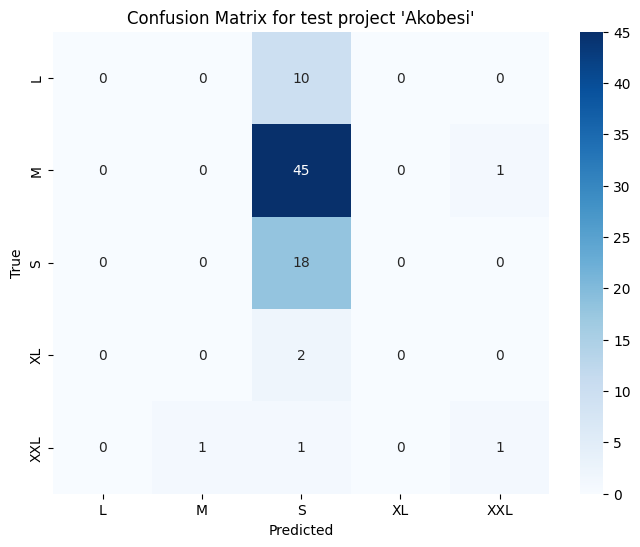

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.00      0.00      0.00        46
           S       0.24      1.00      0.39        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.22      0.23      0.22        79
   macro avg       0.05      0.20      0.08        79
weighted avg       0.05      0.23      0.09        79
 samples avg       0.23      0.23      0.23        79

Precision: 0.054683544303797474     Recall: 0.22784810126582278      Accuracy: 0.22784810126582278      F1 Score: 0.08819926500612495

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

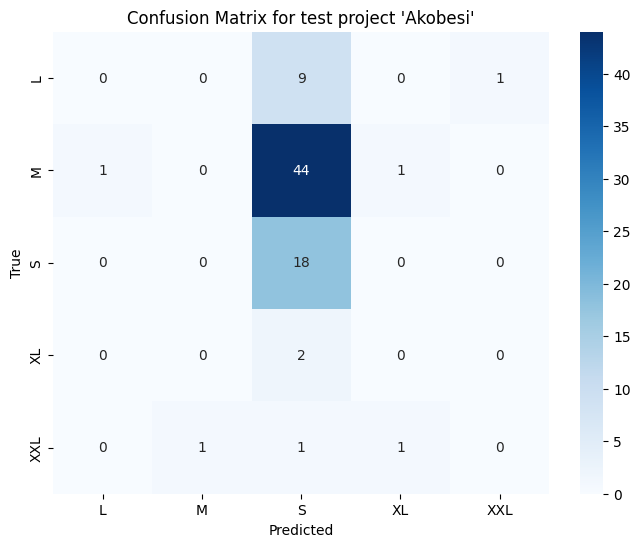

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       1.00      0.50      0.67        10
           M       0.33      0.04      0.08        46
           S       0.13      0.33      0.18        18
          XL       0.00      0.00      0.00         2
         XXL       0.09      1.00      0.16         3

   micro avg       0.16      0.20      0.18        79
   macro avg       0.31      0.38      0.22        79
weighted avg       0.35      0.20      0.18        79
 samples avg       0.11      0.20      0.14        79

Precision: 0.3530170700114142     Recall: 0.20253164556962025      Accuracy: 0.06329113924050633      F1 Score: 0.17723910555356254

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


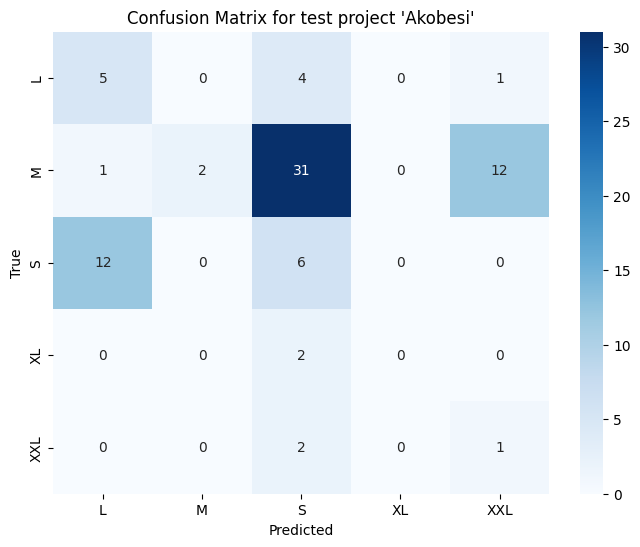

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.83      0.91         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.71      0.62      0.67         8
   macro avg       0.20      0.17      0.18         8
weighted avg       0.75      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.75     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6818181818181818

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

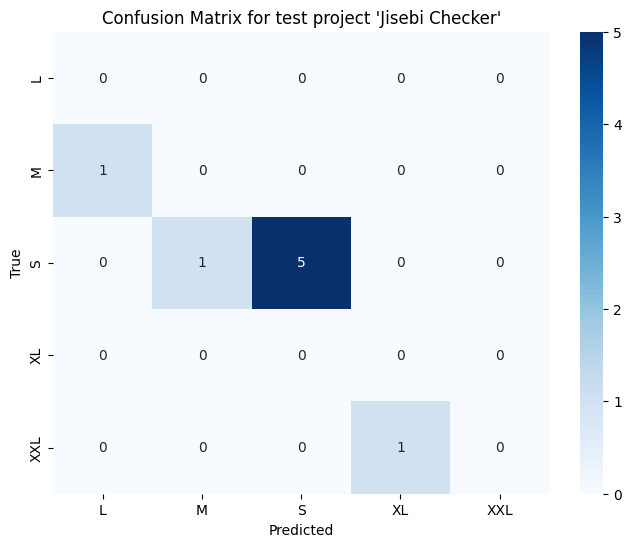

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.71      0.83      0.77         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.50      0.62      0.56         8
   macro avg       0.14      0.17      0.15         8
weighted avg       0.54      0.62      0.58         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.5357142857142857     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.5769230769230769

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

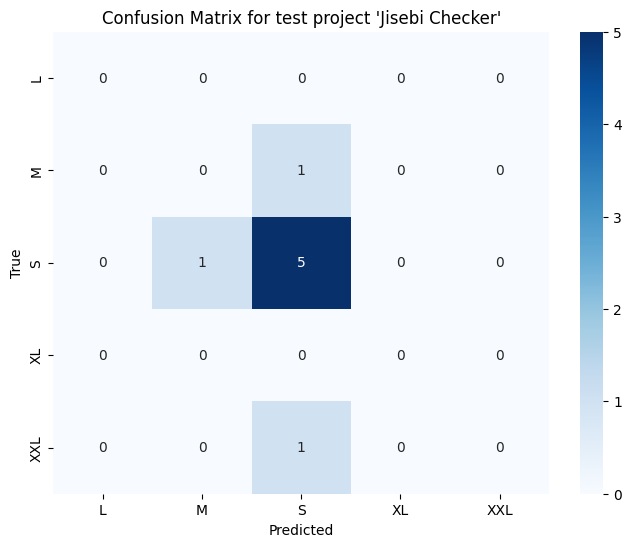

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.83      0.91         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.71      0.62      0.67         8
   macro avg       0.20      0.17      0.18         8
weighted avg       0.75      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.75     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6818181818181818

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

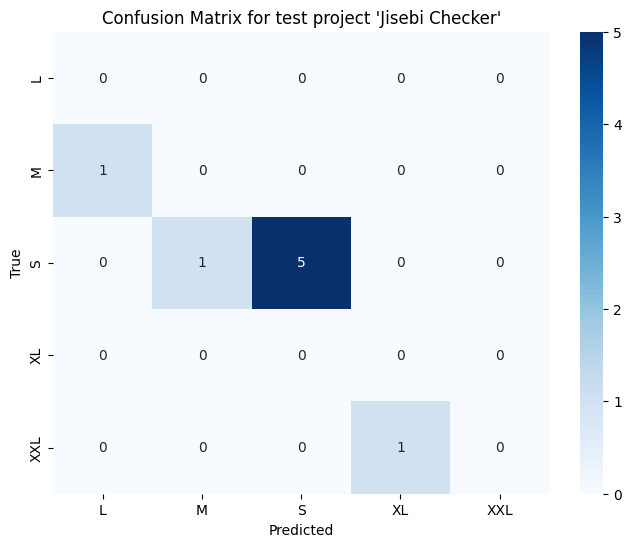

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71         9
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00         1

   micro avg       0.75      0.60      0.67        10
   macro avg       0.40      0.31      0.34        10
weighted avg       1.00      0.60      0.74        10
 samples avg       0.60      0.60      0.60        10

Precision: 1.0     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.7428571428571429

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

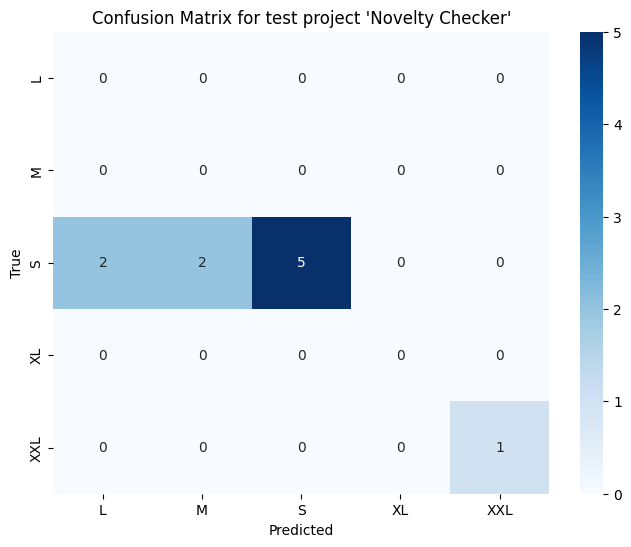

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00         1

   micro avg       0.64      0.70      0.67        10
   macro avg       0.40      0.33      0.36        10
weighted avg       1.00      0.70      0.82        10
 samples avg       0.70      0.70      0.70        10

Precision: 1.0     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.82

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

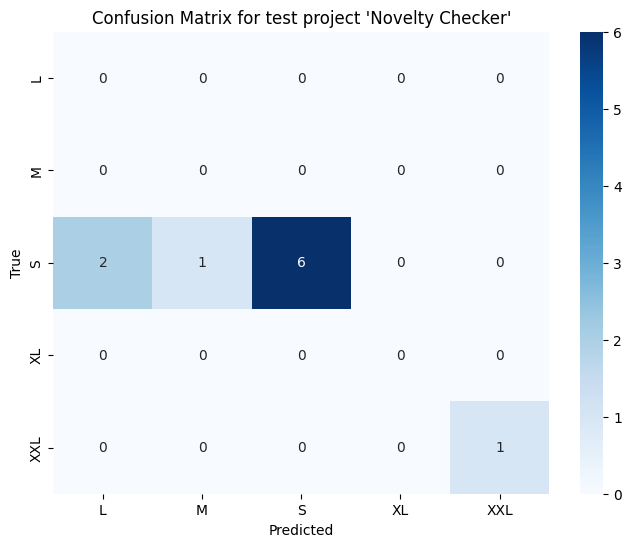

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.86      0.67      0.75         9
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.67      0.60      0.63        10
   macro avg       0.17      0.13      0.15        10
weighted avg       0.77      0.60      0.68        10
 samples avg       0.60      0.60      0.60        10

Precision: 0.7714285714285714     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.675

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

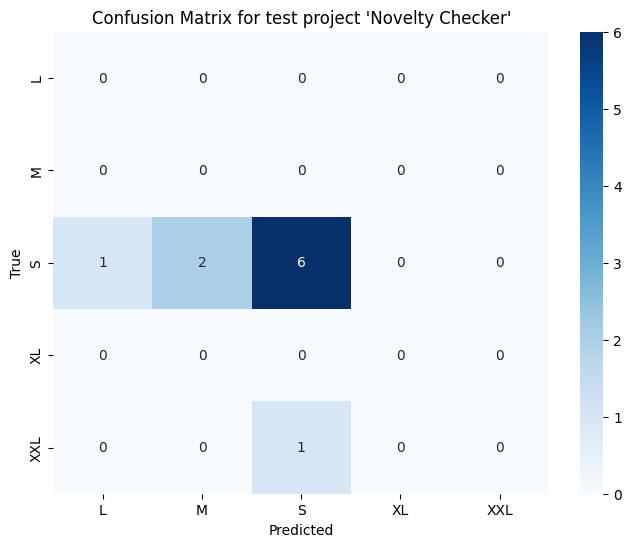

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.78      0.70      0.74        10
          XL       0.00      0.00      0.00         1
         XXL       1.00      1.00      1.00         1

   micro avg       0.62      0.57      0.59        14
   macro avg       0.36      0.34      0.35        14
weighted avg       0.63      0.57      0.60        14
 samples avg       0.57      0.57      0.57        14

Precision: 0.6269841269841271     Recall: 0.5714285714285714      Accuracy: 0.5714285714285714      F1 Score: 0.5977443609022555

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

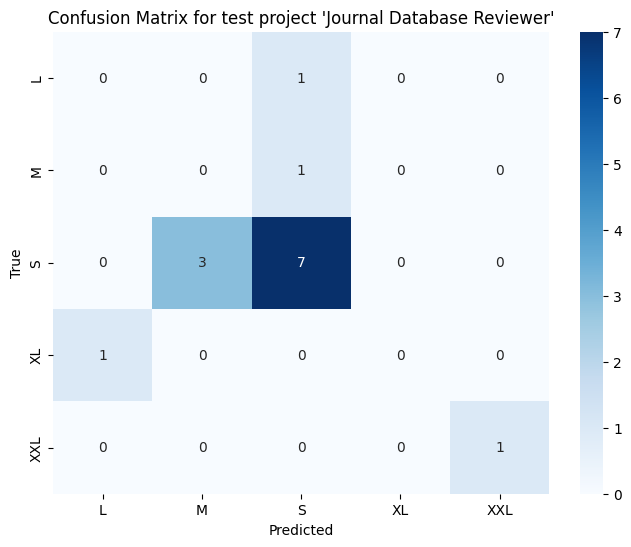

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.25      1.00      0.40         1
           S       0.78      0.70      0.74        10
          XL       0.00      0.00      0.00         1
         XXL       1.00      1.00      1.00         1

   micro avg       0.64      0.64      0.64        14
   macro avg       0.41      0.54      0.43        14
weighted avg       0.64      0.64      0.63        14
 samples avg       0.64      0.64      0.64        14

Precision: 0.6448412698412699     Recall: 0.6428571428571429      Accuracy: 0.6428571428571429      F1 Score: 0.626315789473684

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


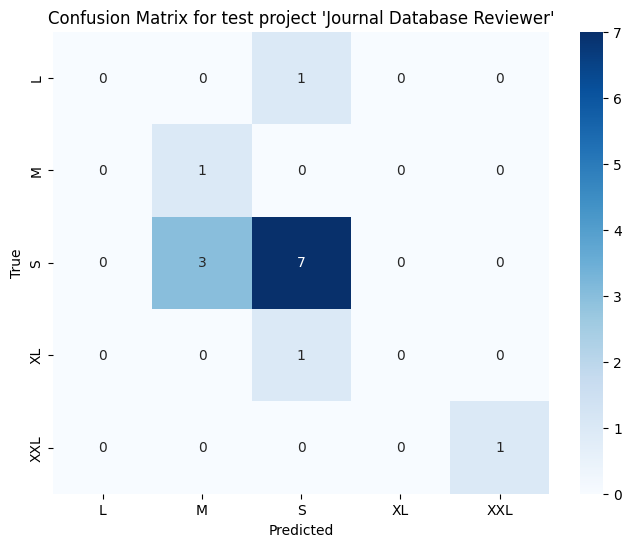

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.57      0.40      0.47        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.29      0.29      0.29        14
   macro avg       0.11      0.08      0.09        14
weighted avg       0.41      0.29      0.34        14
 samples avg       0.29      0.29      0.29        14

Precision: 0.4081632653061224     Recall: 0.2857142857142857      Accuracy: 0.2857142857142857      F1 Score: 0.33613445378151263

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

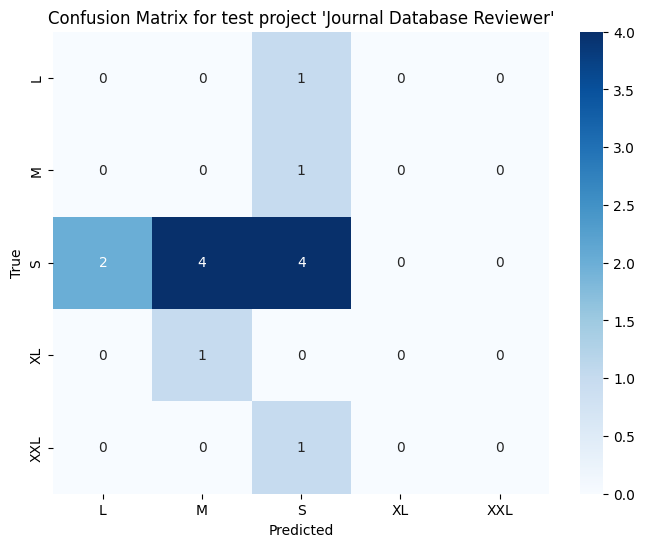

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         6
   macro avg       0.12      0.20      0.15         6
weighted avg       0.30      0.50      0.37         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.3     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.37499999999999994

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

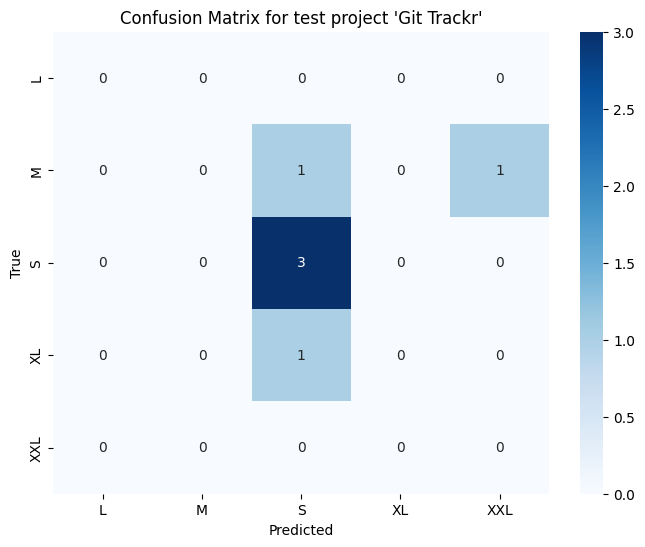

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.25      0.33      0.29         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.14      0.17      0.15         6
   macro avg       0.05      0.07      0.06         6
weighted avg       0.12      0.17      0.14         6
 samples avg       0.17      0.17      0.17         6

Precision: 0.125     Recall: 0.16666666666666666      Accuracy: 0.16666666666666666      F1 Score: 0.14285714285714288

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

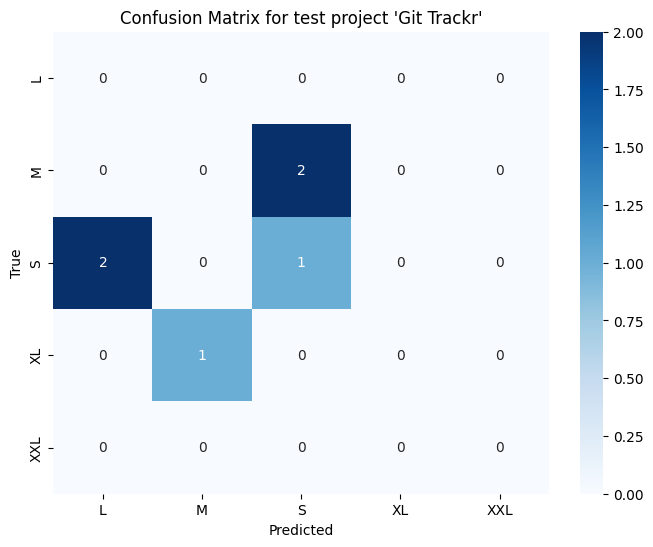

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.25      0.50      0.33         2
           S       0.33      0.33      0.33         3
          XL       0.33      1.00      0.50         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.30      0.50      0.37         6
   macro avg       0.18      0.37      0.23         6
weighted avg       0.31      0.50      0.36         6
 samples avg       0.31      0.50      0.36         6

Precision: 0.3055555555555555     Recall: 0.5      Accuracy: 0.16666666666666666      F1 Score: 0.3611111111111111

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

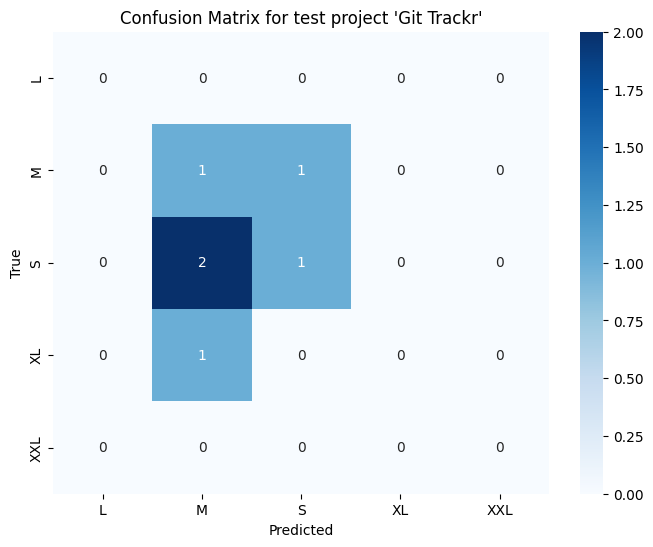

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.57      0.80      0.67         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.80      0.80      0.80         5
 samples avg       0.60      0.80      0.67         5

Precision: 0.8     Recall: 0.8      Accuracy: 0.4      F1 Score: 0.8

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

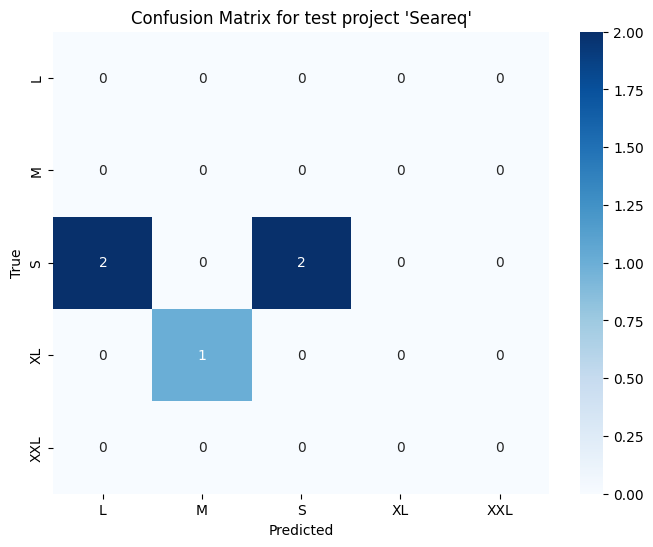

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.57      0.80      0.67         5
   macro avg       0.16      0.20      0.18         5
weighted avg       0.64      0.80      0.71         5
 samples avg       0.60      0.80      0.67         5

Precision: 0.64     Recall: 0.8      Accuracy: 0.4      F1 Score: 0.7111111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

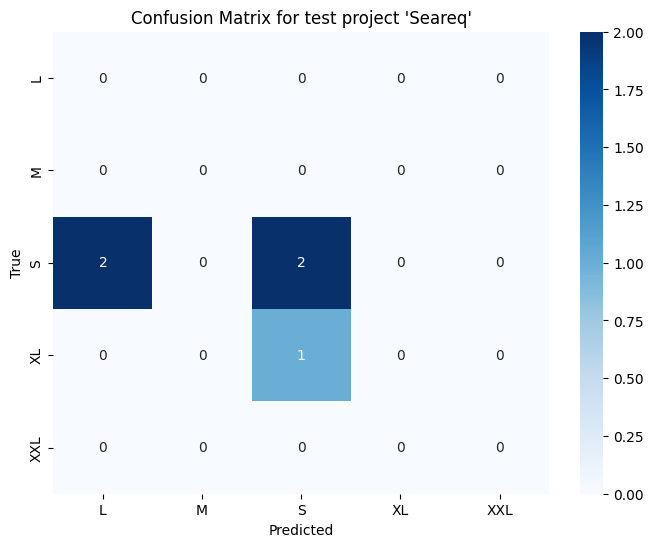

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00         4
          XL       1.00      1.00      1.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.25      0.20      0.22         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.20      0.20      0.20         5
 samples avg       0.10      0.20      0.13         5

Precision: 0.2     Recall: 0.2      Accuracy: 0.0      F1 Score: 0.2

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

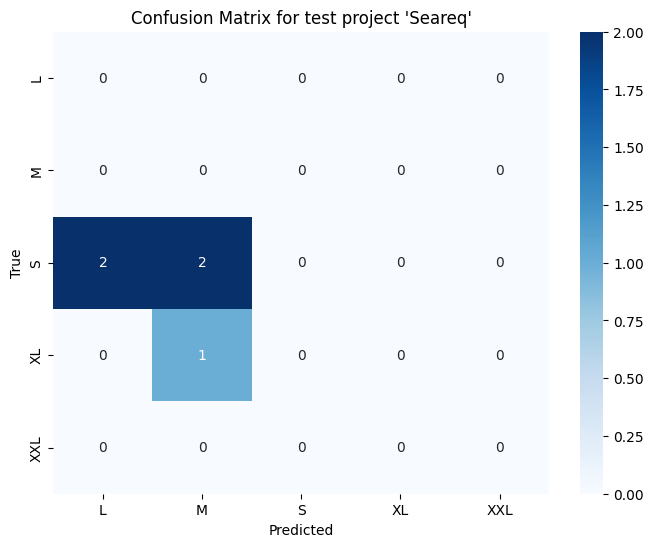

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         2
           S       0.93      0.87      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.76      0.72      0.74        18
   macro avg       0.19      0.17      0.18        18
weighted avg       0.77      0.72      0.75        18
 samples avg       0.72      0.72      0.72        18

Precision: 0.7738095238095238     Recall: 0.7222222222222222      Accuracy: 0.7222222222222222      F1 Score: 0.7471264367816093

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

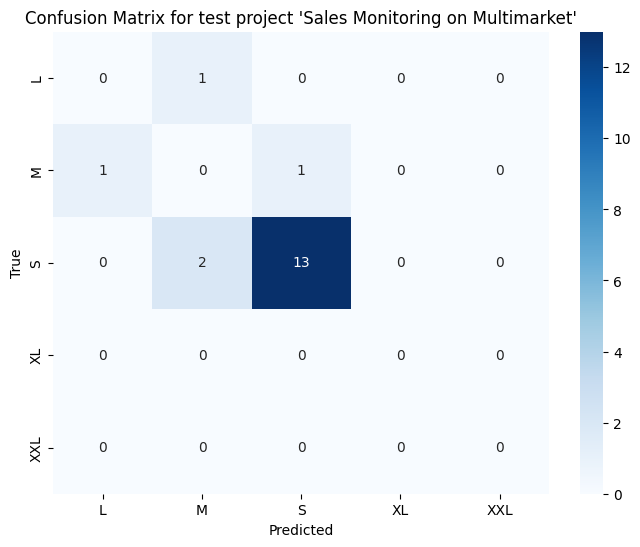

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.25      0.50      0.33         2
           S       0.93      0.87      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.74      0.78      0.76        18
   macro avg       0.24      0.27      0.25        18
weighted avg       0.80      0.78      0.78        18
 samples avg       0.75      0.78      0.76        18

Precision: 0.8015873015873016     Recall: 0.7777777777777778      Accuracy: 0.7222222222222222      F1 Score: 0.7841634738186463

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

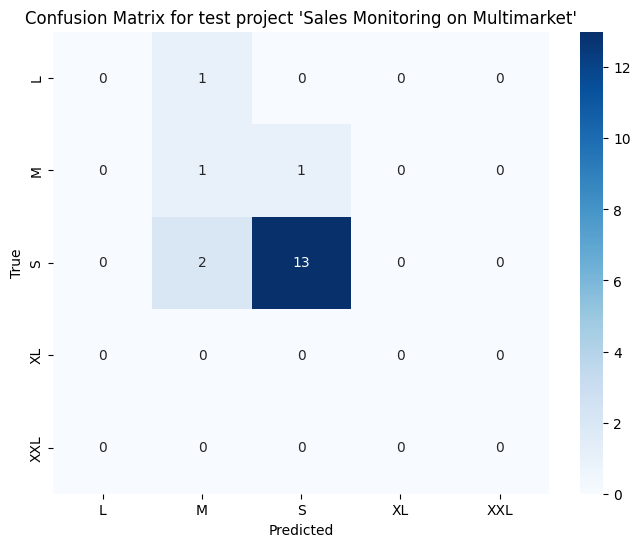

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.08      0.50      0.14         2
           S       0.83      0.33      0.48        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.33      0.33      0.33        18
   macro avg       0.18      0.17      0.12        18
weighted avg       0.70      0.33      0.41        18
 samples avg       0.31      0.33      0.31        18

Precision: 0.7037037037037037     Recall: 0.3333333333333333      Accuracy: 0.2777777777777778      F1 Score: 0.4126984126984127

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

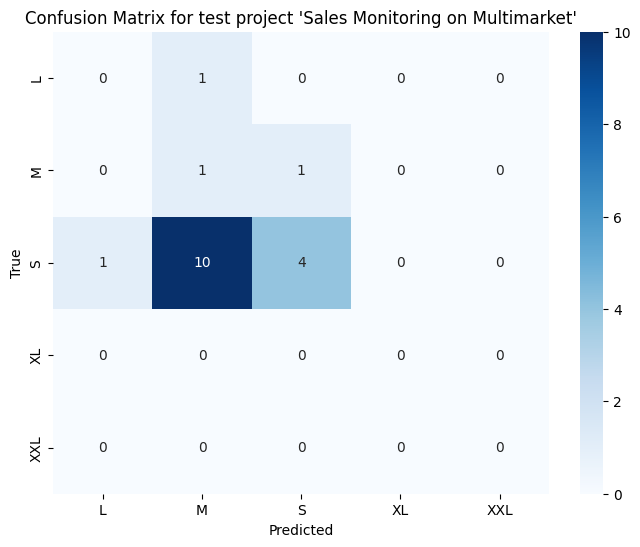

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.83      1.00      0.91         5
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67         2

   micro avg       0.86      0.75      0.80         8
   macro avg       0.37      0.30      0.32         8
weighted avg       0.77      0.75      0.73         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.7708333333333334     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7348484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

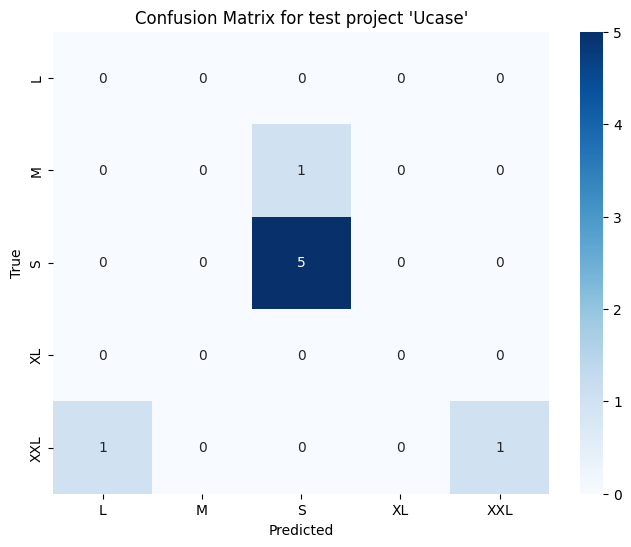

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67         2

   micro avg       1.00      0.88      0.93         8
   macro avg       0.60      0.50      0.53         8
weighted avg       1.00      0.88      0.92         8
 samples avg       0.88      0.88      0.88         8

Precision: 1.0     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.9166666666666666

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

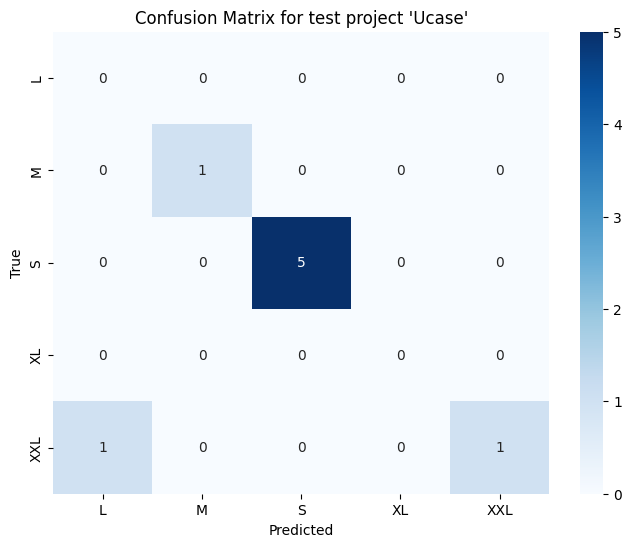

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.57      0.80      0.67         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       0.57      0.50      0.53         8
   macro avg       0.11      0.16      0.13         8
weighted avg       0.36      0.50      0.42         8
 samples avg       0.50      0.50      0.50         8

Precision: 0.3571428571428571     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.41666666666666663

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

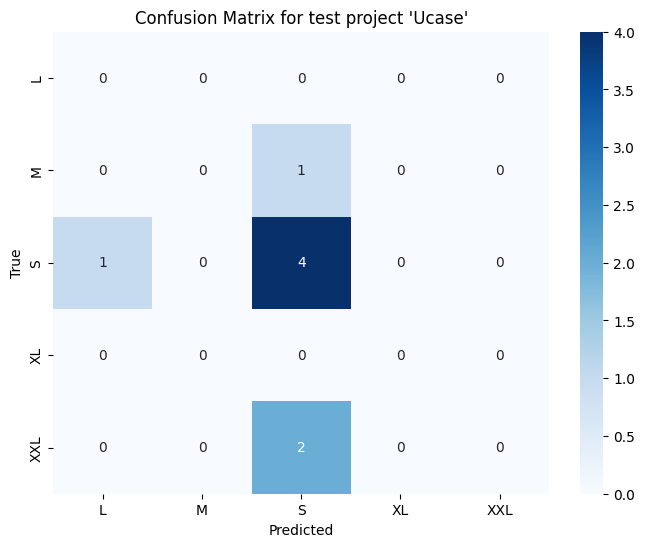

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.88      1.00      0.93         7
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50         3

   micro avg       0.73      0.73      0.73        11
   macro avg       0.38      0.27      0.29        11
weighted avg       0.83      0.73      0.73        11
 samples avg       0.68      0.73      0.70        11

Precision: 0.8295454545454546     Recall: 0.7272727272727273      Accuracy: 0.6363636363636364      F1 Score: 0.7303030303030303

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

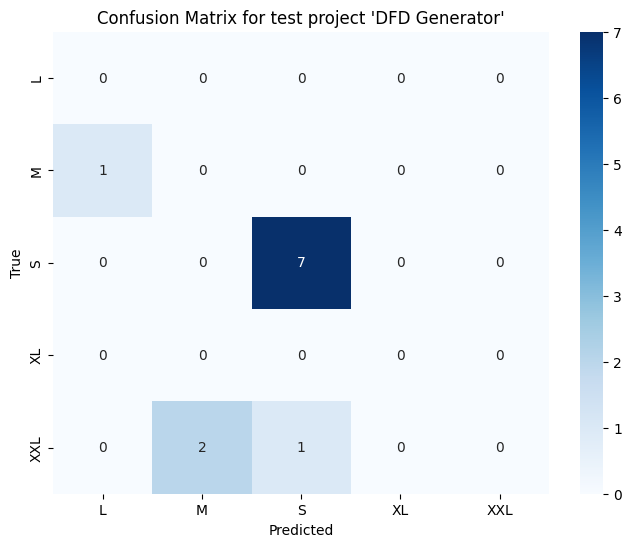

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       0.75      0.86      0.80         7
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50         3

   micro avg       0.62      0.73      0.67        11
   macro avg       0.45      0.44      0.39        11
weighted avg       0.80      0.73      0.71        11
 samples avg       0.64      0.73      0.67        11

Precision: 0.7954545454545454     Recall: 0.7272727272727273      Accuracy: 0.5454545454545454      F1 Score: 0.706060606060606

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


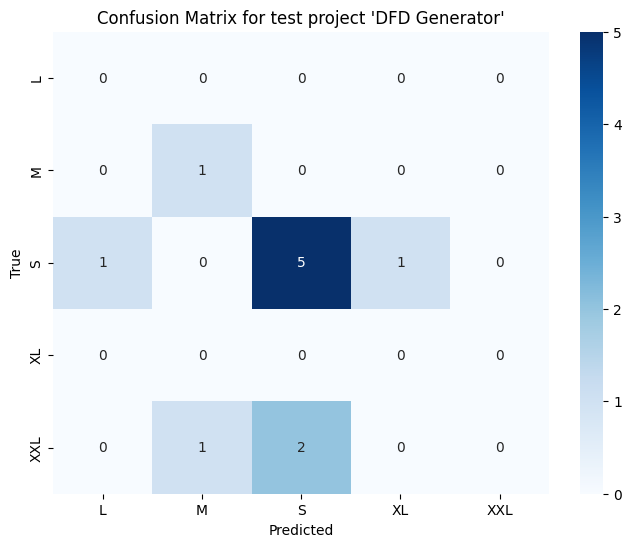

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.50      0.57      0.53         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       0.44      0.36      0.40        11
   macro avg       0.10      0.11      0.11        11
weighted avg       0.32      0.36      0.34        11
 samples avg       0.36      0.36      0.36        11

Precision: 0.3181818181818182     Recall: 0.36363636363636365      Accuracy: 0.36363636363636365      F1 Score: 0.3393939393939394

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

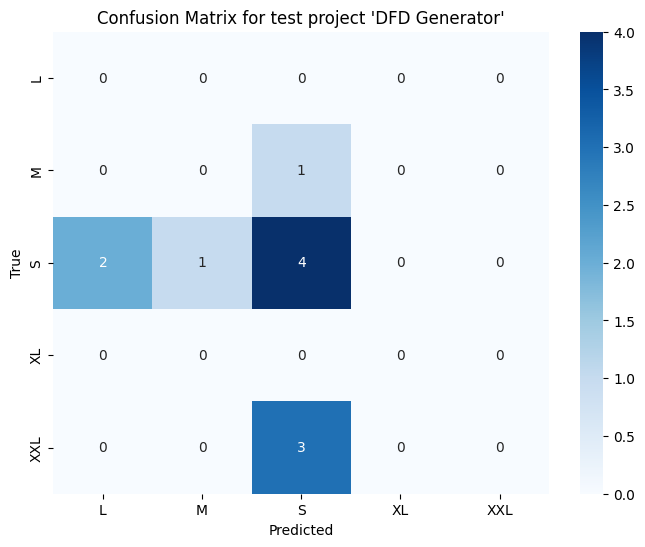

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.86      0.86      0.86         7
          XL       0.00      0.00      0.00         2
         XXL       0.33      1.00      0.50         1

   micro avg       0.64      0.64      0.64        11
   macro avg       0.24      0.37      0.27        11
weighted avg       0.58      0.64      0.59        11
 samples avg       0.55      0.64      0.58        11

Precision: 0.5757575757575757     Recall: 0.6363636363636364      Accuracy: 0.45454545454545453      F1 Score: 0.5909090909090909

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

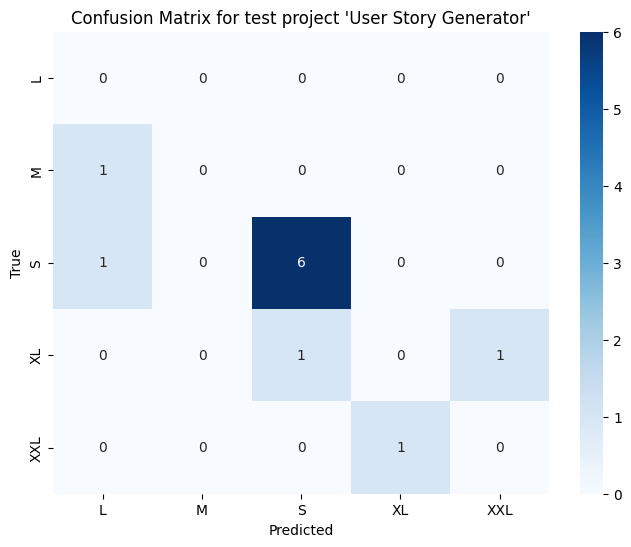

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.71      0.83         7
          XL       0.00      0.00      0.00         2
         XXL       0.25      1.00      0.40         1

   micro avg       0.70      0.64      0.67        11
   macro avg       0.45      0.54      0.45        11
weighted avg       0.75      0.64      0.66        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.75     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6575757575757576

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

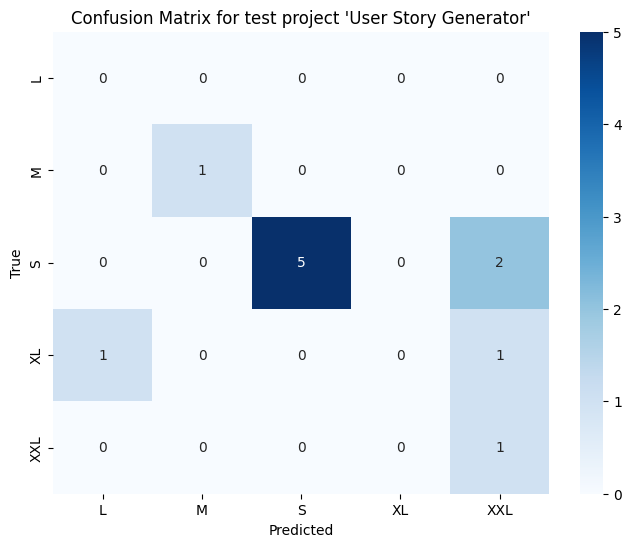

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.67      0.86      0.75         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.67      0.55      0.60        11
   macro avg       0.13      0.17      0.15        11
weighted avg       0.42      0.55      0.48        11
 samples avg       0.55      0.55      0.55        11

Precision: 0.4242424242424242     Recall: 0.5454545454545454      Accuracy: 0.5454545454545454      F1 Score: 0.4772727272727273

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

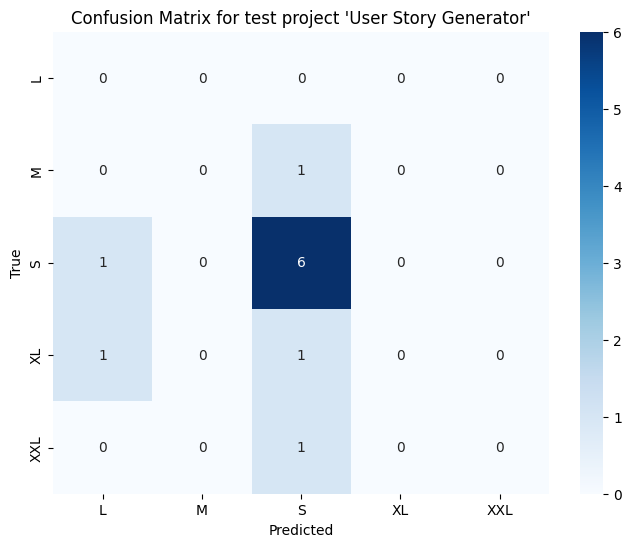

In [7]:
# Model (Numerik) <== All Features
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


unique_projects = df['Project Name'].unique()

accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())


# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [8]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result


,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.066622,0.240506,0.240506,0.099919,0.054684,0.227848,0.227848,0.088199,0.353017,0.202532,0.063291,0.177239
1,Jisebi Checker,0.750000,0.625000,0.625000,0.681818,0.535714,0.625000,0.625000,0.576923,0.750000,0.625000,0.625000,0.681818
2,Novelty Checker,1.000000,0.600000,0.600000,0.742857,1.000000,0.700000,0.700000,0.820000,0.771429,0.600000,0.600000,0.675000
3,Journal Database Reviewer,0.626984,0.571429,0.571429,0.597744,0.644841,0.642857,0.642857,0.626316,0.408163,0.285714,0.285714,0.336134
4,Git Trackr,0.300000,0.500000,0.500000,0.375000,0.125000,0.166667,0.166667,0.142857,0.305556,0.500000,0.166667,0.361111
5,Seareq,0.800000,0.800000,0.400000,0.800000,0.640000,0.800000,0.400000,0.711111,0.200000,0.200000,0.000000,0.200000
6,Sales Monitoring on Multimarket,0.773810,0.722222,0.722222,0.747126,0.801587,0.777778,0.722222,0.784163,0.703704,0.333333,0.277778,0.412698
7,Ucase,0.770833,0.750000,0.750000,0.734848,1.000000,0.875000,0.875000,0.916667,0.357143,0.500000,0.500000,0.416667
8,DFD Generator,0.829545,0.727273,0.636364,0.730303,0.795455,0.727273,0.545455,0.706061,0.318182,0.363636,0.363636,0.339394
9,User Story Generator,0.575758,0.636364,0.454545,0.590909,0.750000,0.636364,0.636364,0.657576,0.424242,0.545455,0.545455,0.477273


In [9]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.5500066213673809, 0.5541412314830036, 0.34275407784901457]


Feature Selection

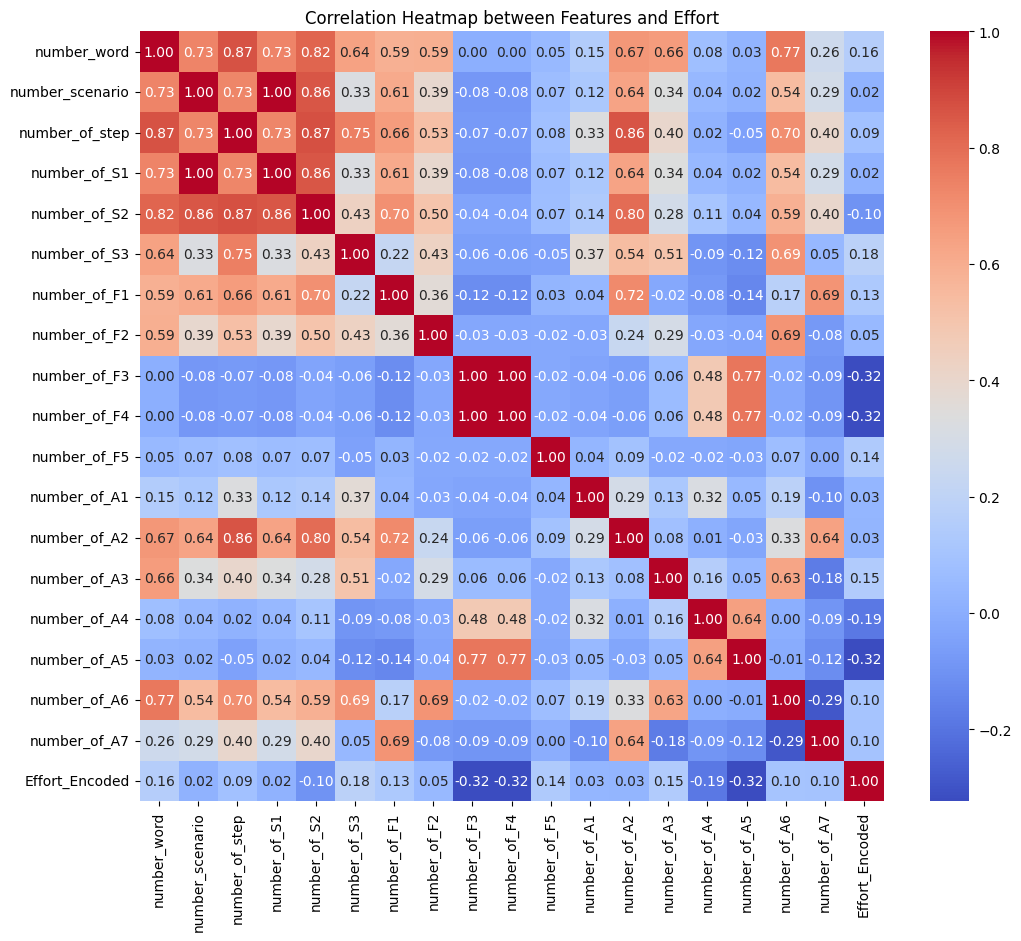

In [10]:
# Heatmap
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Effort' column
df['Effort_Encoded'] = label_encoder.fit_transform(df['Effort'])

# Drop the original 'Effort' column if needed
# df.drop('Effort', axis=1, inplace=True)

# Now, you can proceed to calculate the correlation matrix
data = pd.concat([df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']], df['Effort_Encoded']], axis=1)
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Effort')
plt.show()


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.00      0.00      0.00        46
           S       0.24      0.94      0.38        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.21      0.22      0.21        79
   macro avg       0.05      0.19      0.08        79
weighted avg       0.05      0.22      0.09        79
 samples avg       0.20      0.22      0.21        79

Precision: 0.05379746835443038     Recall: 0.21518987341772153      Accuracy: 0.189873417721519      F1 Score: 0.08607594936708861

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

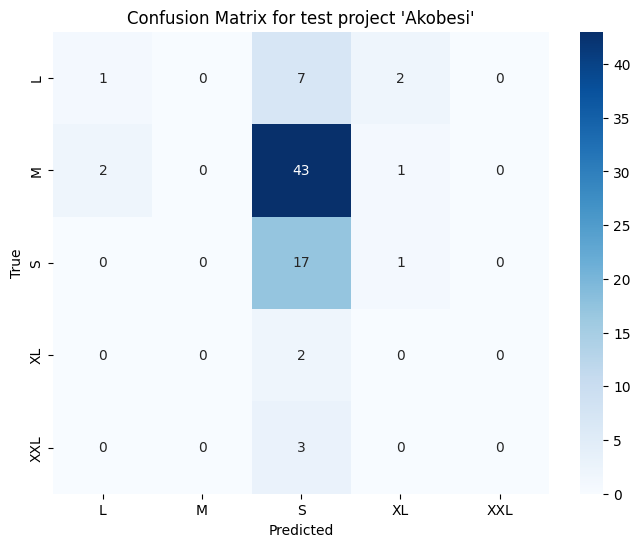

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.53      0.43      0.48        46
           S       0.23      0.83      0.36        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.33      0.44      0.38        79
   macro avg       0.15      0.25      0.17        79
weighted avg       0.36      0.44      0.36        79
 samples avg       0.28      0.44      0.34        79

Precision: 0.35824601780631093     Recall: 0.4430379746835443      Accuracy: 0.12658227848101267      F1 Score: 0.35864978902953587

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

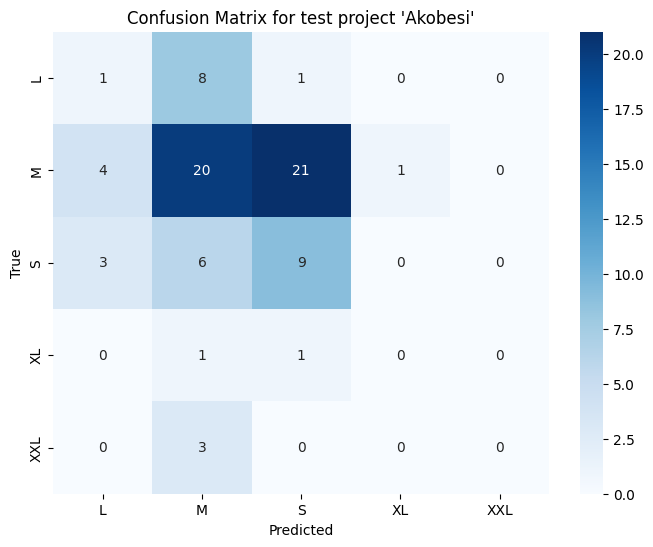

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.20      1.00      0.33        10
           M       0.58      0.61      0.60        46
           S       0.34      1.00      0.51        18
          XL       0.04      1.00      0.07         2
         XXL       0.07      1.00      0.14         3

   micro avg       0.25      0.77      0.37        79
   macro avg       0.25      0.92      0.33        79
weighted avg       0.45      0.77      0.51        79
 samples avg       0.27      0.77      0.37        79

Precision: 0.44609767492531194     Recall: 0.7721518987341772      Accuracy: 0.08860759493670886      F1 Score: 0.5116271783210673

Confusion matrix for test project 'Akobesi':


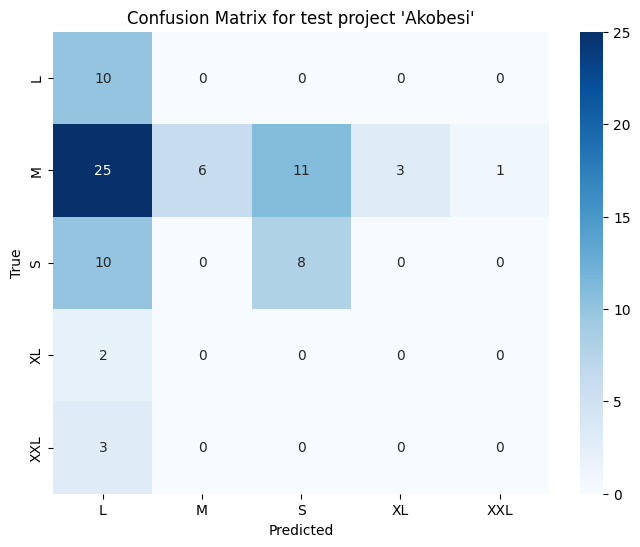

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.71      0.83      0.77         6
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00         1

   micro avg       0.67      0.75      0.71         8
   macro avg       0.34      0.37      0.35         8
weighted avg       0.66      0.75      0.70         8
 samples avg       0.69      0.75      0.71         8

Precision: 0.6607142857142857     Recall: 0.75      Accuracy: 0.625      F1 Score: 0.7019230769230769

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

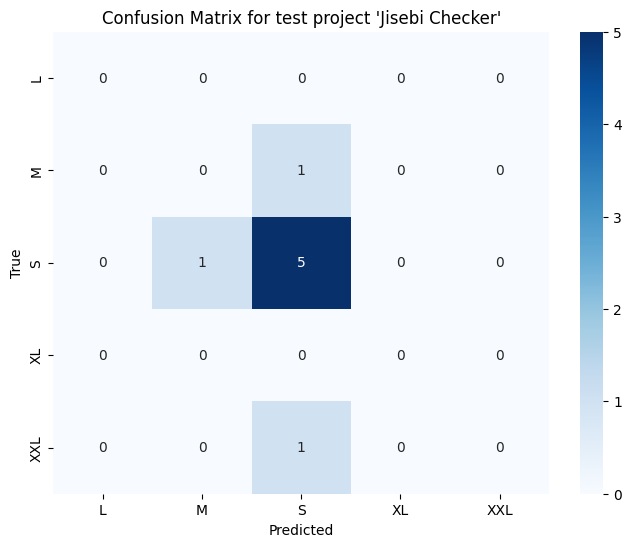

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.67      0.80         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.71      0.62      0.67         8
   macro avg       0.30      0.33      0.29         8
weighted avg       0.81      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.8125     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6833333333333335

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

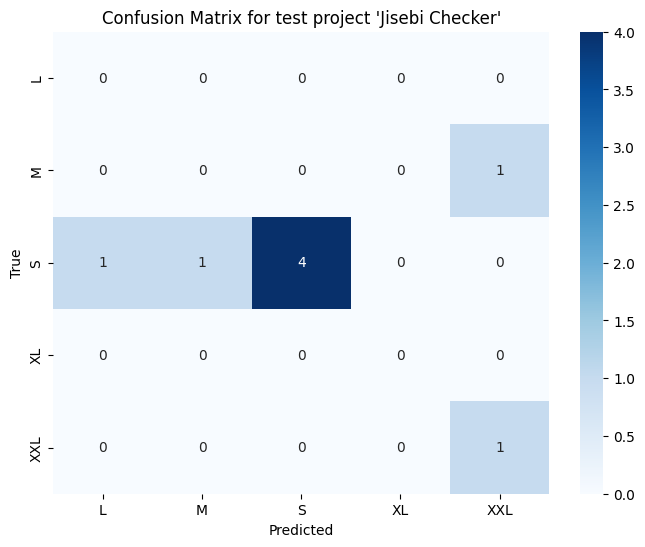

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.75      1.00      0.86         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.64      0.88      0.74         8
   macro avg       0.25      0.40      0.30         8
weighted avg       0.62      0.88      0.73         8
 samples avg       0.75      0.88      0.79         8

Precision: 0.625     Recall: 0.875      Accuracy: 0.625      F1 Score: 0.7261904761904762

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

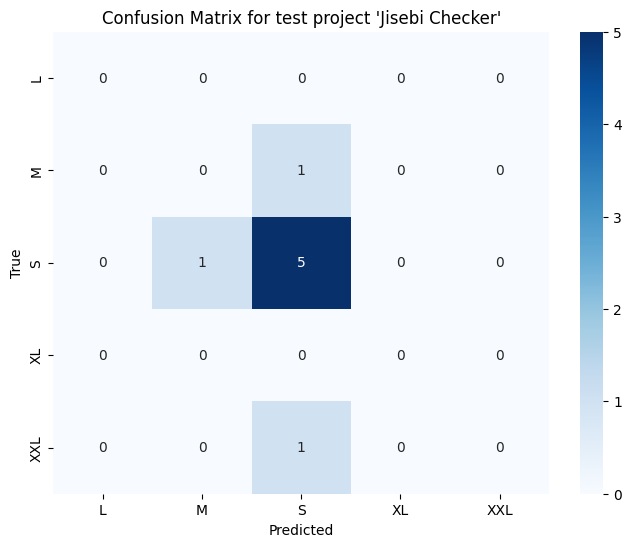

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.83      0.56      0.67         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.60      0.60      0.60        10
   macro avg       0.23      0.31      0.23        10
weighted avg       0.78      0.60      0.65        10
 samples avg       0.55      0.60      0.57        10

Precision: 0.7833333333333333     Recall: 0.6      Accuracy: 0.5      F1 Score: 0.6500000000000001

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

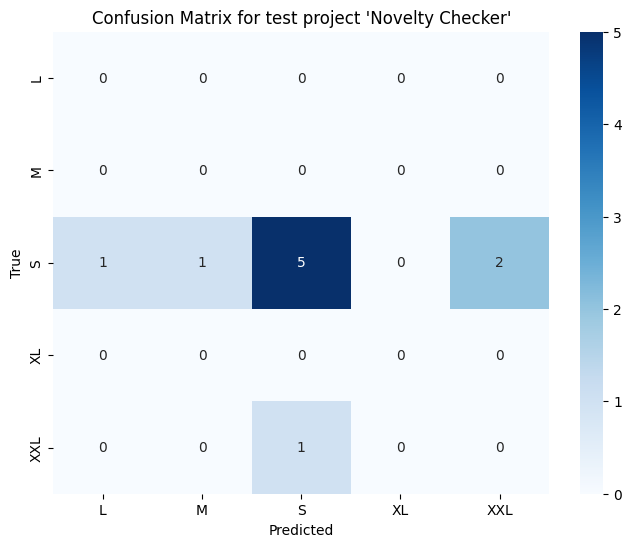

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.60      0.60      0.60        10
   macro avg       0.27      0.31      0.24        10
weighted avg       0.93      0.60      0.69        10
 samples avg       0.60      0.60      0.60        10

Precision: 0.9333333333333333     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.6928571428571428

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

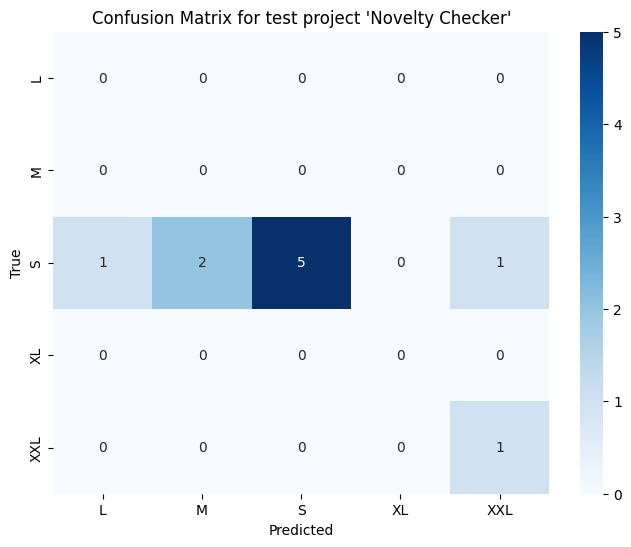

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.78      0.88         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.73      0.80      0.76        10
   macro avg       0.27      0.36      0.28        10
weighted avg       0.93      0.80      0.84        10
 samples avg       0.75      0.80      0.77        10



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 0.9333333333333333     Recall: 0.8      Accuracy: 0.7      F1 Score: 0.8375

Confusion matrix for test project 'Novelty Checker':


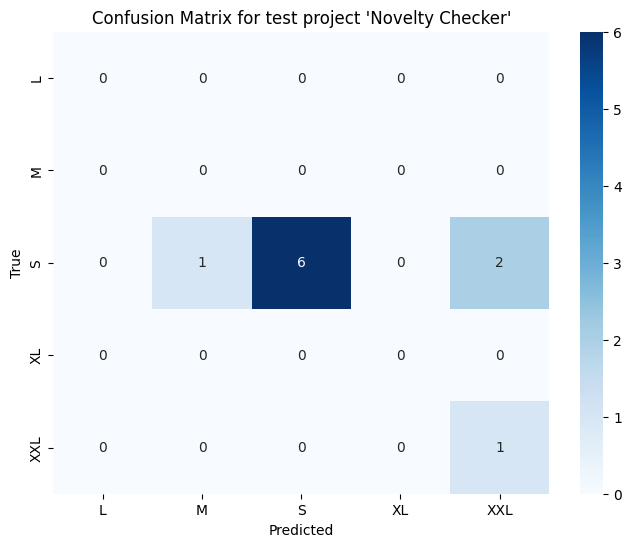

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.33      1.00      0.50         1
           S       0.78      0.70      0.74        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.67      0.57      0.62        14
   macro avg       0.22      0.34      0.25        14
weighted avg       0.58      0.57      0.56        14
 samples avg       0.57      0.57      0.57        14

Precision: 0.5793650793650793     Recall: 0.5714285714285714      Accuracy: 0.5714285714285714      F1 Score: 0.5620300751879698

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

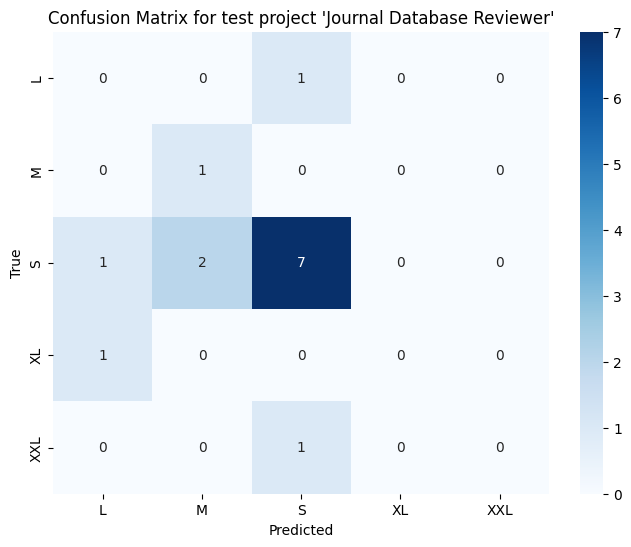

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      1.00      1.00         1
           S       0.88      0.70      0.78        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.89      0.57      0.70        14
   macro avg       0.38      0.34      0.36        14
weighted avg       0.70      0.57      0.63        14
 samples avg       0.57      0.57      0.57        14

Precision: 0.6964285714285714     Recall: 0.5714285714285714      Accuracy: 0.5714285714285714      F1 Score: 0.6269841269841269

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

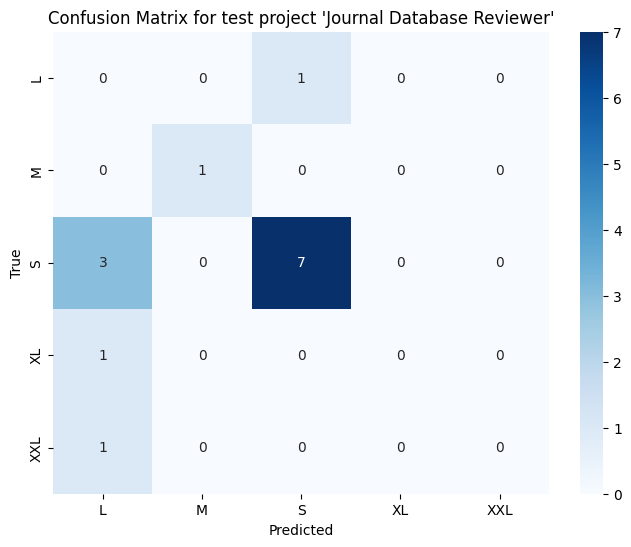

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.33      1.00      0.50         1
           M       0.17      1.00      0.29         1
           S       0.69      0.90      0.78        10
          XL       0.17      1.00      0.29         1
         XXL       0.25      1.00      0.40         1

   micro avg       0.41      0.93      0.57        14
   macro avg       0.32      0.98      0.45        14
weighted avg       0.56      0.93      0.66        14
 samples avg       0.59      0.93      0.66        14

Precision: 0.559981684981685     Recall: 0.9285714285714286      Accuracy: 0.42857142857142855      F1 Score: 0.6641082519964508

Confusion matrix for test project 'Journal Database Reviewer':


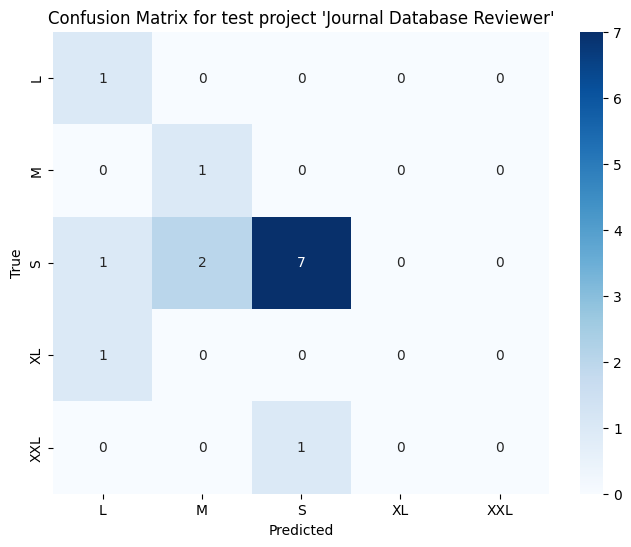

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      0.67      0.57         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.50      0.33      0.40         6
   macro avg       0.10      0.13      0.11         6
weighted avg       0.25      0.33      0.29         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.25     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.28571428571428575

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

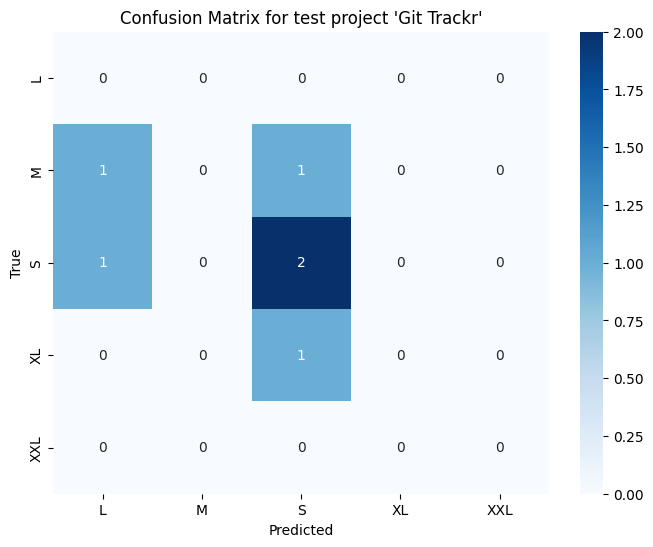

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.67      0.67      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.67      0.33      0.44         6
   macro avg       0.13      0.13      0.13         6
weighted avg       0.33      0.33      0.33         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.3333333333333333     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

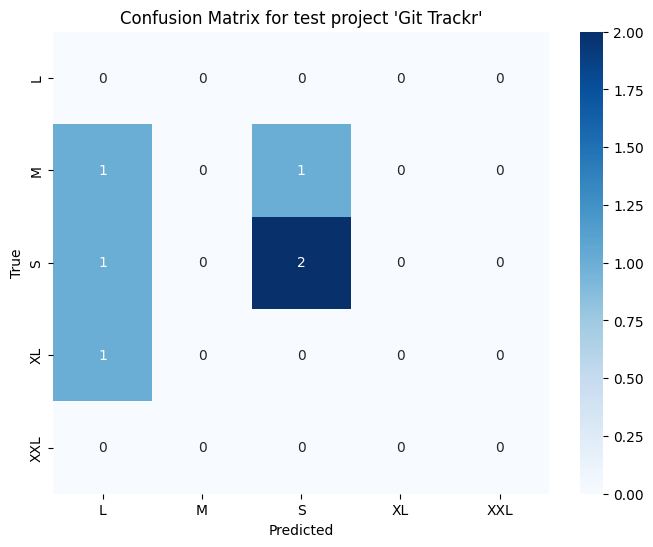

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      1.00      0.67         3
          XL       0.50      1.00      0.67         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.36      0.67      0.47         6
   macro avg       0.20      0.40      0.27         6
weighted avg       0.33      0.67      0.44         6
 samples avg       0.39      0.67      0.47         6

Precision: 0.3333333333333333     Recall: 0.6666666666666666      Accuracy: 0.16666666666666666      F1 Score: 0.4444444444444444

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

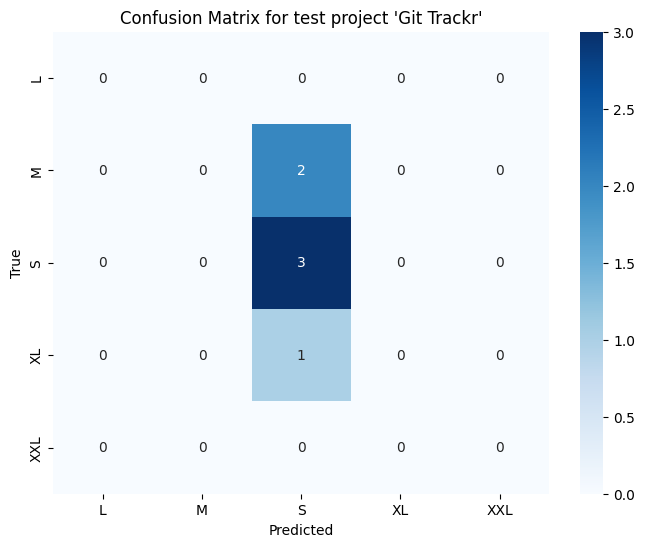

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.75      0.75      0.75         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.75      0.60      0.67         5
   macro avg       0.15      0.15      0.15         5
weighted avg       0.60      0.60      0.60         5
 samples avg       0.60      0.60      0.60         5

Precision: 0.6     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.6

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

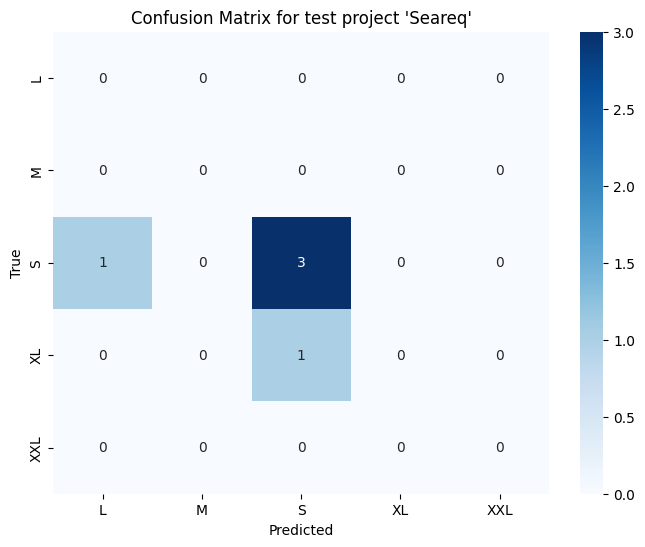

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80         5
   macro avg       0.16      0.20      0.18         5
weighted avg       0.64      0.80      0.71         5
 samples avg       0.80      0.80      0.80         5

Precision: 0.64     Recall: 0.8      Accuracy: 0.8      F1 Score: 0.7111111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

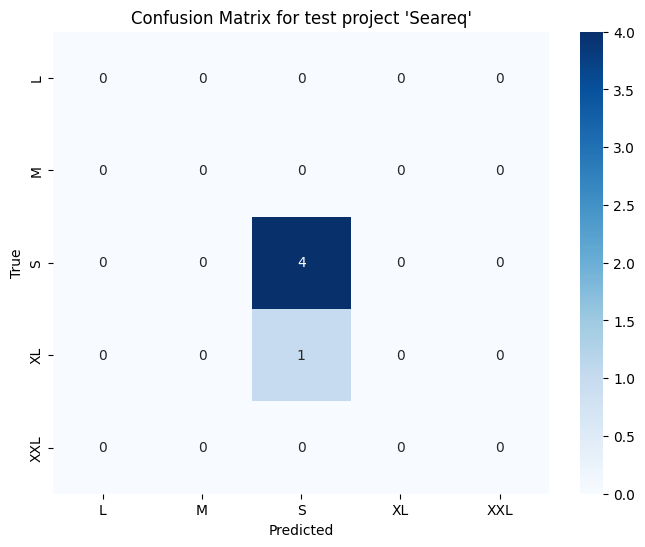

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.25      1.00      0.40         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.33      1.00      0.50         5
   macro avg       0.21      0.40      0.26         5
weighted avg       0.69      1.00      0.79         5
 samples avg       0.43      1.00      0.56         5

Precision: 0.6900000000000001     Recall: 1.0      Accuracy: 0.2      F1 Score: 0.7911111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


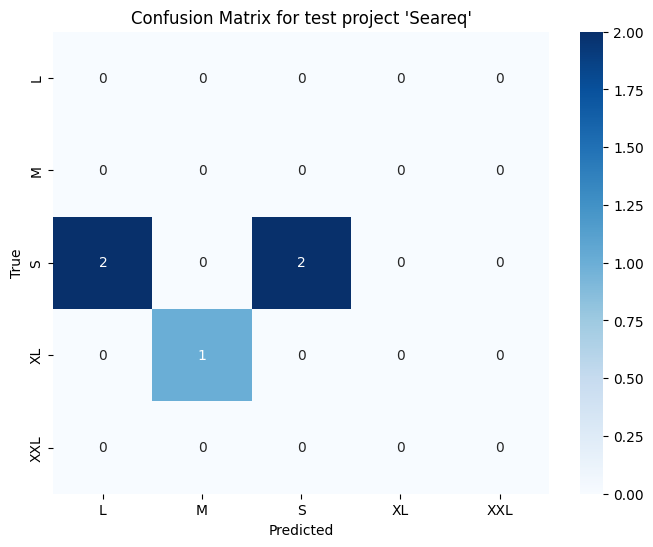

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.87      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.93      0.78      0.85        18
   macro avg       0.39      0.27      0.31        18
weighted avg       0.88      0.78      0.82        18
 samples avg       0.78      0.78      0.78        18

Precision: 0.8849206349206349     Recall: 0.7777777777777778      Accuracy: 0.7777777777777778      F1 Score: 0.8212005108556834

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

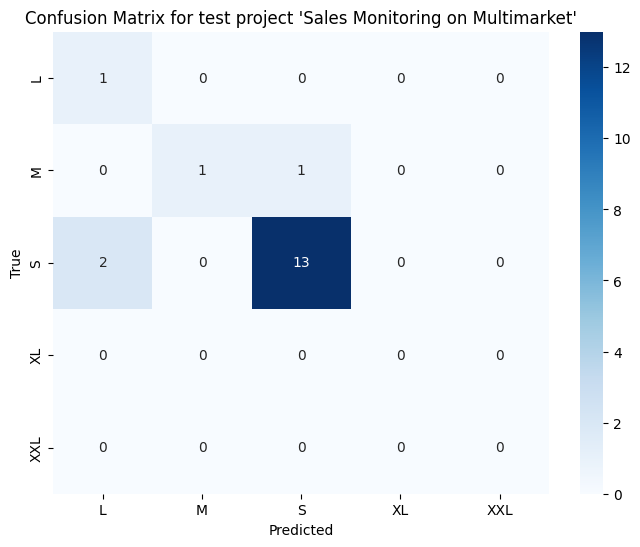

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.50      1.00      0.67         2
           S       0.92      0.73      0.81        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.81      0.72      0.76        18
   macro avg       0.28      0.35      0.30        18
weighted avg       0.82      0.72      0.75        18
 samples avg       0.67      0.72      0.69        18

Precision: 0.8194444444444444     Recall: 0.7222222222222222      Accuracy: 0.6111111111111112      F1 Score: 0.7530864197530864

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

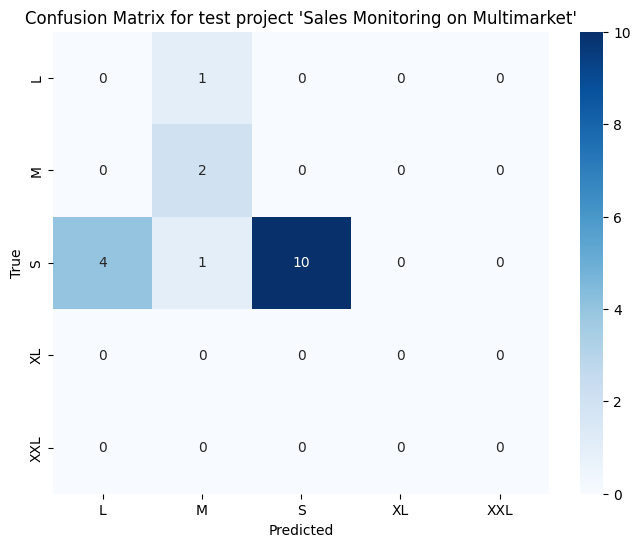

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.50      0.50      0.50         2
           S       0.88      0.93      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.68      0.83      0.75        18
   macro avg       0.28      0.29      0.28        18
weighted avg       0.78      0.83      0.81        18
 samples avg       0.69      0.83      0.74        18

Precision: 0.7847222222222222     Recall: 0.8333333333333334      Accuracy: 0.5555555555555556      F1 Score: 0.8082437275985663

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

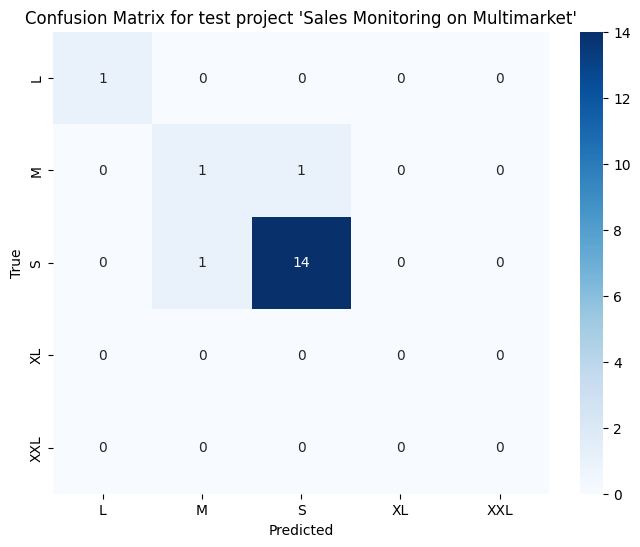

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.83      1.00      0.91         5
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67         2

   micro avg       0.88      0.88      0.88         8
   macro avg       0.57      0.50      0.52         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

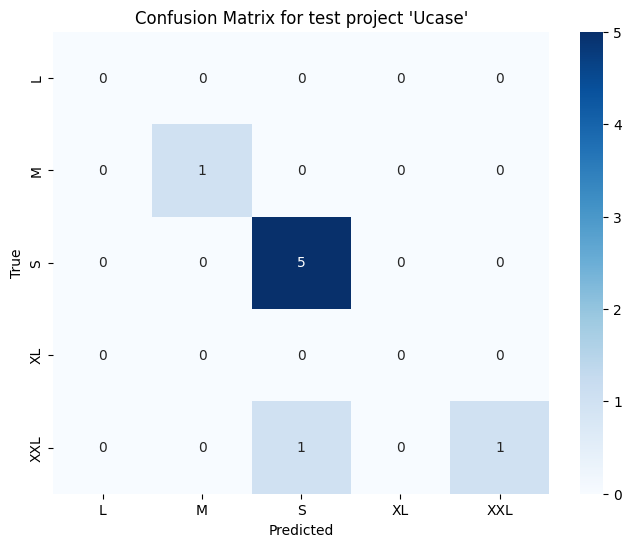

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       0.86      0.75      0.80         8
   macro avg       0.40      0.40      0.40         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

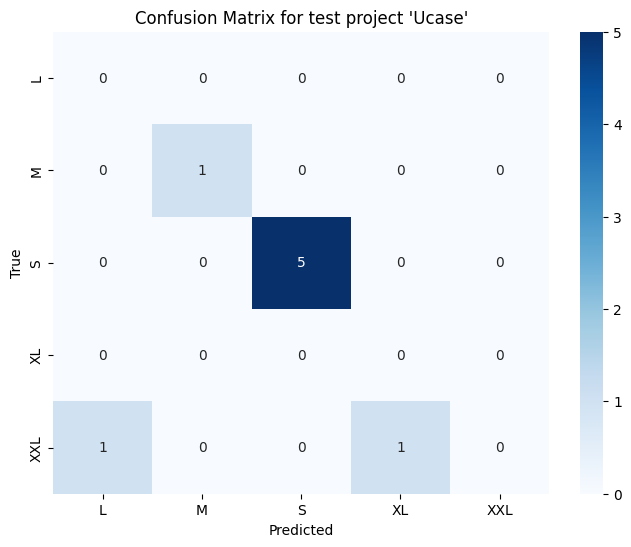

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.62      1.00      0.77         5
          XL       0.00      0.00      0.00         0
         XXL       0.67      1.00      0.80         2

   micro avg       0.50      1.00      0.67         8
   macro avg       0.46      0.60      0.51         8
weighted avg       0.68      1.00      0.81         8
 samples avg       0.68      1.00      0.76         8

Precision: 0.6822916666666666     Recall: 1.0      Accuracy: 0.5      F1 Score: 0.8057692307692308

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


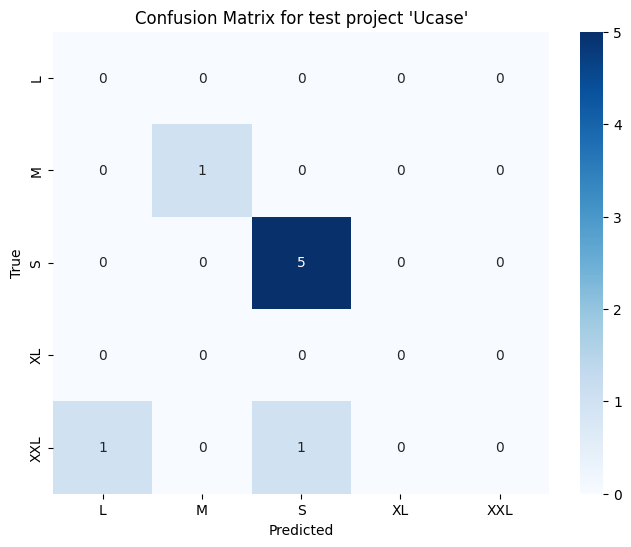

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.86      0.86      0.86         7
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.67      0.80         3

   micro avg       0.90      0.82      0.86        11
   macro avg       0.57      0.50      0.53        11
weighted avg       0.91      0.82      0.85        11
 samples avg       0.77      0.82      0.79        11

Precision: 0.9090909090909091     Recall: 0.8181818181818182      Accuracy: 0.7272727272727273      F1 Score: 0.8545454545454546

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

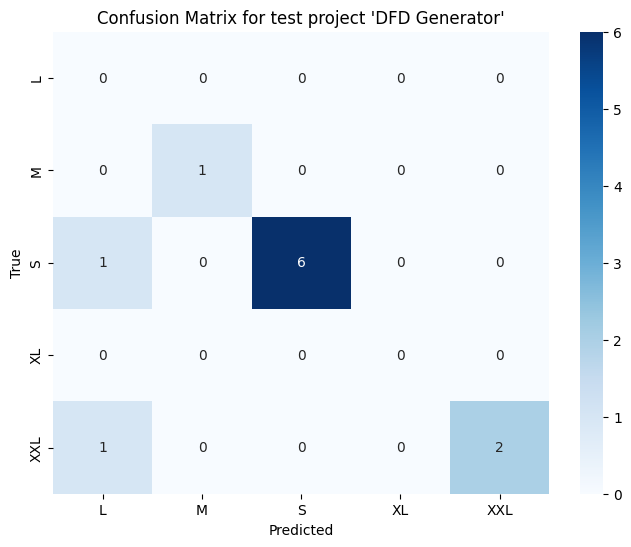

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.75      0.86      0.80         7
          XL       0.00      0.00      0.00         0
         XXL       0.60      1.00      0.75         3

   micro avg       0.71      0.91      0.80        11
   macro avg       0.47      0.57      0.51        11
weighted avg       0.73      0.91      0.80        11
 samples avg       0.77      0.91      0.82        11



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 0.7318181818181819     Recall: 0.9090909090909091      Accuracy: 0.6363636363636364      F1 Score: 0.8045454545454546

Confusion matrix for test project 'DFD Generator':


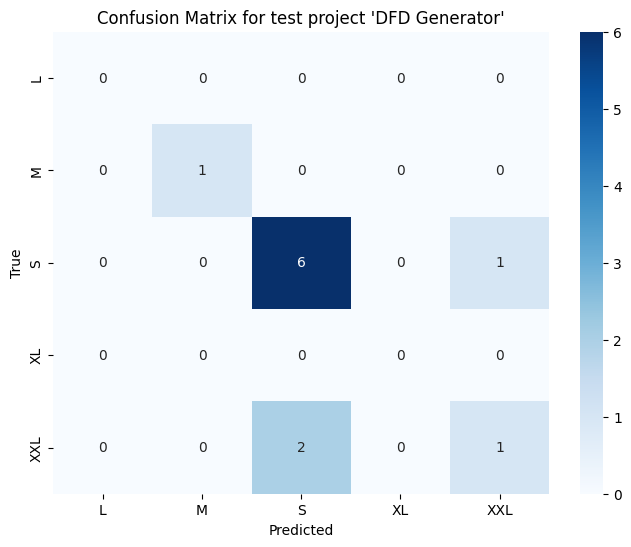

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.88      1.00      0.93         7
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         3

   micro avg       0.55      1.00      0.71        11
   macro avg       0.47      0.60      0.52        11
weighted avg       0.78      1.00      0.87        11
 samples avg       0.65      1.00      0.76        11

Precision: 0.7840909090909091     Recall: 1.0      Accuracy: 0.36363636363636365      F1 Score: 0.8666666666666667

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

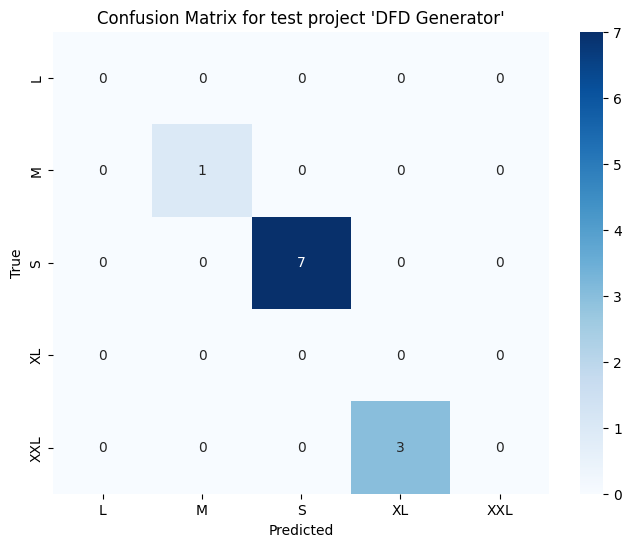

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.80      0.57      0.67         7
          XL       0.00      0.00      0.00         2
         XXL       0.25      1.00      0.40         1

   micro avg       0.60      0.55      0.57        11
   macro avg       0.41      0.51      0.41        11
weighted avg       0.62      0.55      0.55        11
 samples avg       0.55      0.55      0.55        11

Precision: 0.6227272727272728     Recall: 0.5454545454545454      Accuracy: 0.5454545454545454      F1 Score: 0.5515151515151515

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

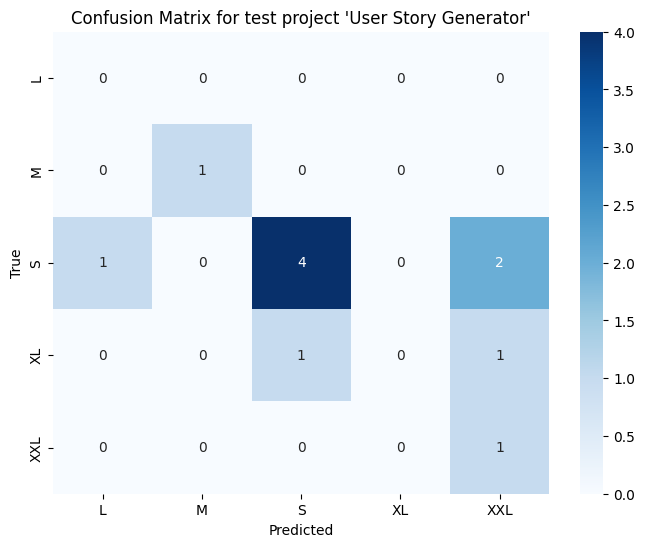

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.83      0.71      0.77         7
          XL       0.00      0.00      0.00         2
         XXL       0.33      1.00      0.50         1

   micro avg       0.70      0.64      0.67        11
   macro avg       0.43      0.54      0.45        11
weighted avg       0.65      0.64      0.63        11
 samples avg       0.64      0.64      0.64        11



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.6515151515151515     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6258741258741258

Confusion matrix for test project 'User Story Generator':


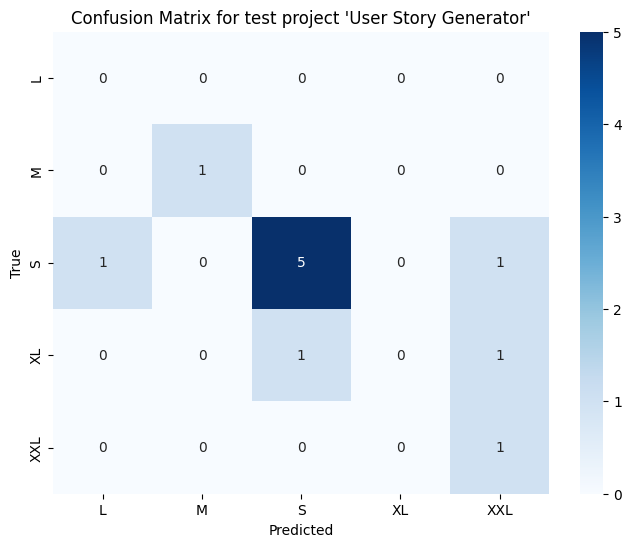

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.64      1.00      0.78         7
          XL       0.00      0.00      0.00         2
         XXL       0.25      1.00      0.40         1

   micro avg       0.56      0.82      0.67        11
   macro avg       0.38      0.60      0.44        11
weighted avg       0.52      0.82      0.62        11
 samples avg       0.64      0.82      0.70        11

Precision: 0.518595041322314     Recall: 0.8181818181818182      Accuracy: 0.45454545454545453      F1 Score: 0.6222222222222222

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

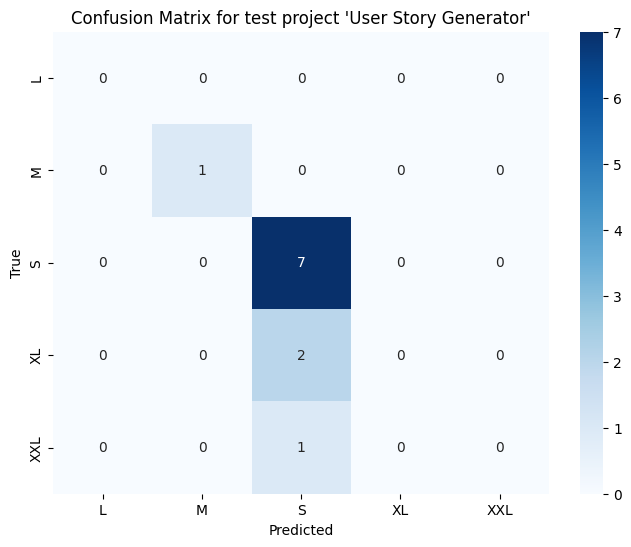

In [39]:
# Model (Numerik) <== All Features
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns


unique_projects = df['Project Name'].unique()

accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())
# Mengambil nama kolom yang berasal dari daftar verb
columns_from_verb_list = [verb + '_count' for verb in unique_verbs]

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_of_F3', 'number_of_F4', 'number_of_F5']+columns_from_verb_list]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_of_F3', 'number_of_F4', 'number_of_F5']+columns_from_verb_list]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [40]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.053797,0.215190,0.189873,0.086076,0.358246,0.443038,0.126582,0.358650,0.446098,0.772152,0.088608,0.511627
1,Jisebi Checker,0.660714,0.750000,0.625000,0.701923,0.812500,0.625000,0.625000,0.683333,0.625000,0.875000,0.625000,0.726190
2,Novelty Checker,0.783333,0.600000,0.500000,0.650000,0.933333,0.600000,0.600000,0.692857,0.933333,0.800000,0.700000,0.837500
3,Journal Database Reviewer,0.579365,0.571429,0.571429,0.562030,0.696429,0.571429,0.571429,0.626984,0.559982,0.928571,0.428571,0.664108
4,Git Trackr,0.250000,0.333333,0.333333,0.285714,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.166667,0.444444
5,Seareq,0.600000,0.600000,0.600000,0.600000,0.640000,0.800000,0.800000,0.711111,0.690000,1.000000,0.200000,0.791111
6,Sales Monitoring on Multimarket,0.884921,0.777778,0.777778,0.821201,0.819444,0.722222,0.611111,0.753086,0.784722,0.833333,0.555556,0.808244
7,Ucase,0.895833,0.875000,0.875000,0.859848,0.750000,0.750000,0.750000,0.750000,0.682292,1.000000,0.500000,0.805769
8,DFD Generator,0.909091,0.818182,0.727273,0.854545,0.731818,0.909091,0.636364,0.804545,0.784091,1.000000,0.363636,0.866667
9,User Story Generator,0.622727,0.545455,0.545455,0.551515,0.651515,0.636364,0.636364,0.625874,0.518595,0.818182,0.454545,0.622222


In [41]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.5745140372988475, 0.5690182567081302, 0.40825830639121785]


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.00      0.00      0.00        46
           S       0.23      1.00      0.38        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.23      0.23      0.23        79
   macro avg       0.05      0.20      0.08        79
weighted avg       0.05      0.23      0.09        79
 samples avg       0.23      0.23      0.23        79



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.053263192503698834     Recall: 0.22784810126582278      Accuracy: 0.22784810126582278      F1 Score: 0.08634243837441705

Confusion matrix for test project 'Akobesi':


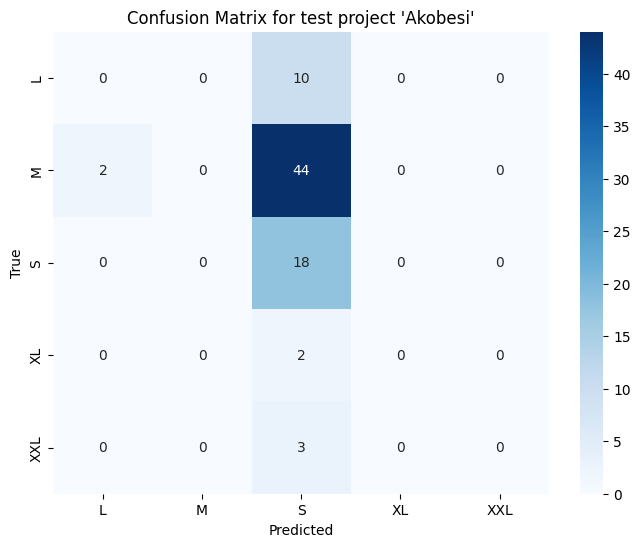

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.62      0.17      0.27        46
           S       0.29      0.83      0.43        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.35      0.29      0.32        79
   macro avg       0.18      0.20      0.14        79
weighted avg       0.43      0.29      0.26        79
 samples avg       0.28      0.29      0.28        79



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.42533936651583715     Recall: 0.2911392405063291      Accuracy: 0.26582278481012656      F1 Score: 0.256970420603901

Confusion matrix for test project 'Akobesi':


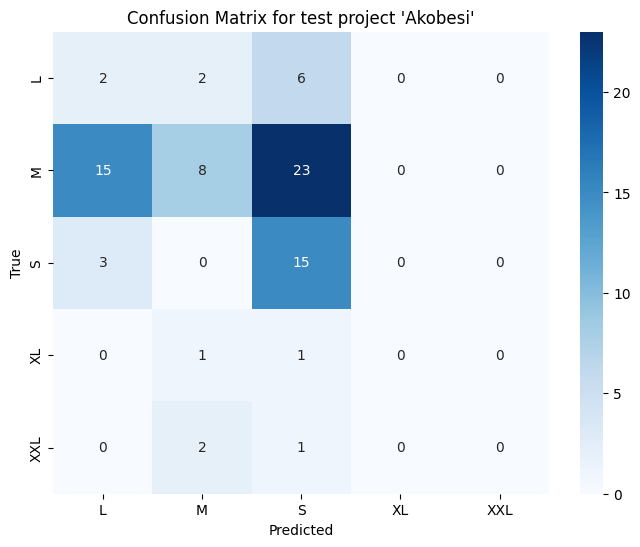

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.21      1.00      0.35        10
           M       0.57      0.59      0.58        46
           S       0.33      1.00      0.50        18
          XL       0.04      1.00      0.07         2
         XXL       0.07      1.00      0.14         3

   micro avg       0.24      0.76      0.37        79
   macro avg       0.25      0.92      0.33        79
weighted avg       0.44      0.76      0.50        79
 samples avg       0.28      0.76      0.37        79

Precision: 0.4411185687083316     Recall: 0.759493670886076      Accuracy: 0.10126582278481013      F1 Score: 0.5034512306415339

Confusion matrix for test project 'Akobesi':


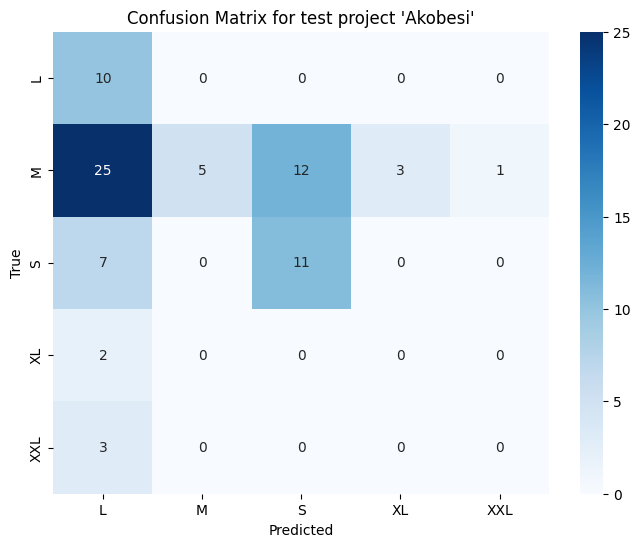

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.71      0.83      0.77         6
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00         1

   micro avg       0.67      0.75      0.71         8
   macro avg       0.34      0.37      0.35         8
weighted avg       0.66      0.75      0.70         8
 samples avg       0.69      0.75      0.71         8

Precision: 0.6607142857142857     Recall: 0.75      Accuracy: 0.625      F1 Score: 0.7019230769230769

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

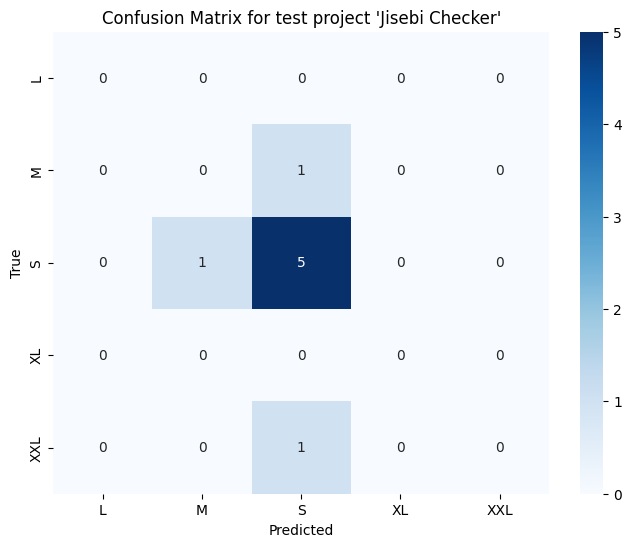

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.67      0.80         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.71      0.62      0.67         8
   macro avg       0.30      0.33      0.29         8
weighted avg       0.81      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.8125     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6833333333333335

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

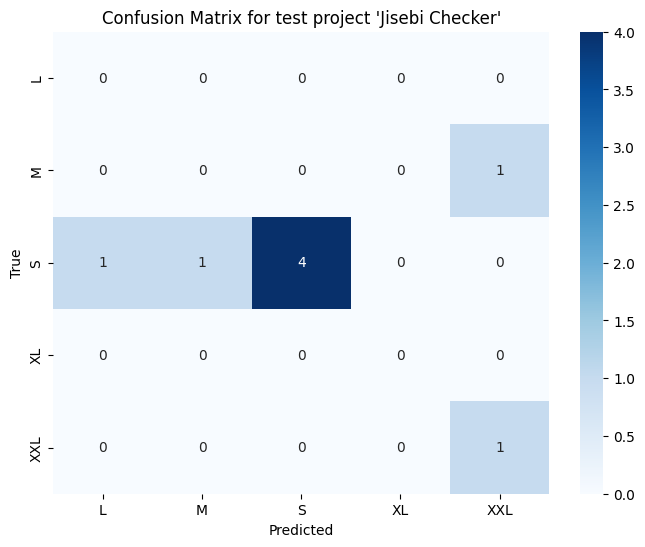

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.75      1.00      0.86         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.64      0.88      0.74         8
   macro avg       0.25      0.40      0.30         8
weighted avg       0.62      0.88      0.73         8
 samples avg       0.75      0.88      0.79         8

Precision: 0.625     Recall: 0.875      Accuracy: 0.625      F1 Score: 0.7261904761904762

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

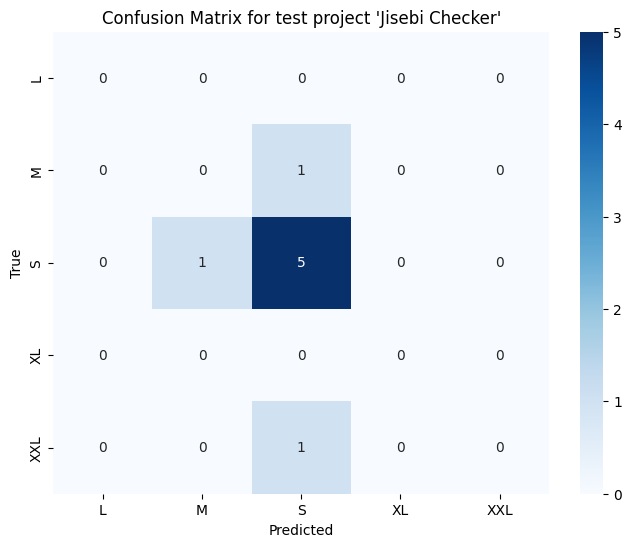

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.86      0.67      0.75         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.64      0.70      0.67        10
   macro avg       0.24      0.33      0.25        10
weighted avg       0.80      0.70      0.72        10
 samples avg       0.65      0.70      0.67        10

Precision: 0.8047619047619048     Recall: 0.7      Accuracy: 0.6      F1 Score: 0.725

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

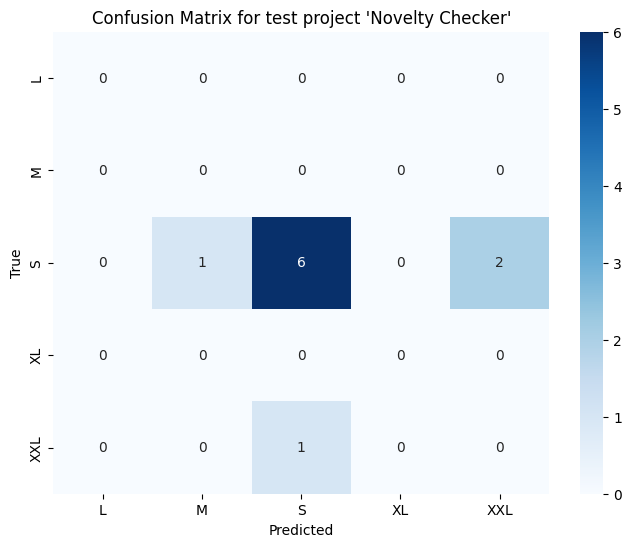

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.70      0.70      0.70        10
   macro avg       0.30      0.33      0.29        10
weighted avg       0.95      0.70      0.79        10
 samples avg       0.65      0.70      0.67        10

Precision: 0.95     Recall: 0.7      Accuracy: 0.6      F1 Score: 0.7866666666666667

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

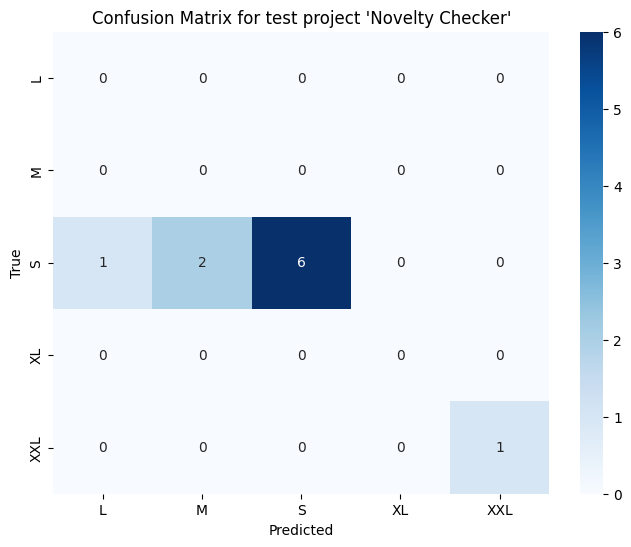

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.78      0.88         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.73      0.80      0.76        10
   macro avg       0.27      0.36      0.28        10
weighted avg       0.93      0.80      0.84        10
 samples avg       0.75      0.80      0.77        10



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

Precision: 0.9333333333333333     Recall: 0.8      Accuracy: 0.7      F1 Score: 0.8375

Confusion matrix for test project 'Novelty Checker':


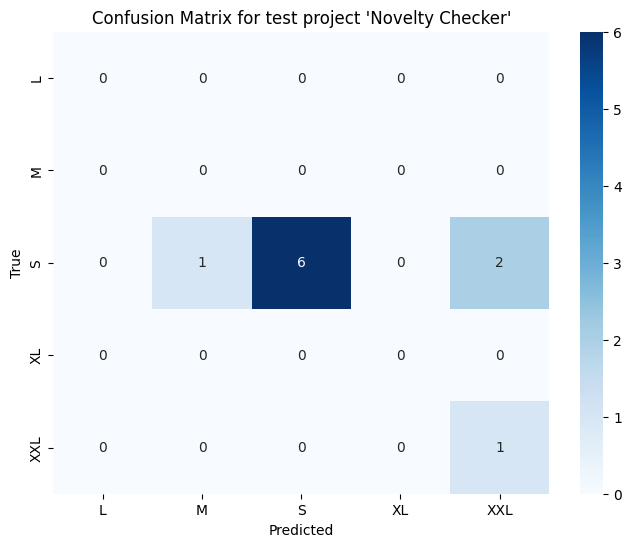

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.25      1.00      0.40         1
           S       0.78      0.70      0.74        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.62      0.57      0.59        14
   macro avg       0.21      0.34      0.23        14
weighted avg       0.57      0.57      0.55        14
 samples avg       0.57      0.57      0.57        14

Precision: 0.5734126984126985     Recall: 0.5714285714285714      Accuracy: 0.5714285714285714      F1 Score: 0.5548872180451127

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

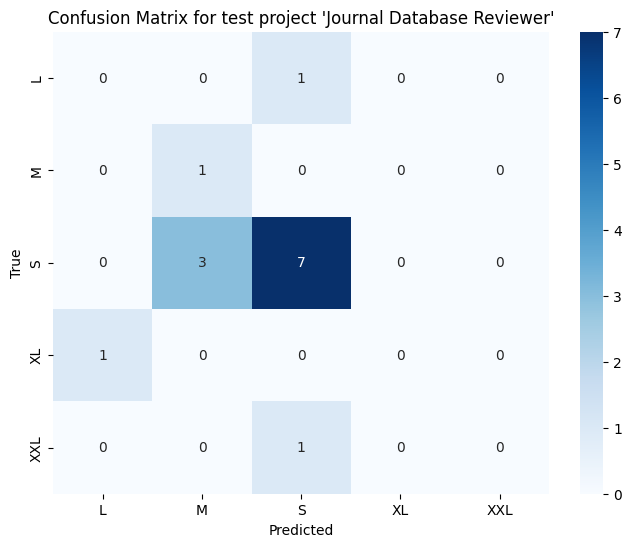

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.20      1.00      0.33         1
           S       0.67      0.40      0.50        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.45      0.36      0.40        14
   macro avg       0.17      0.28      0.17        14
weighted avg       0.49      0.36      0.38        14
 samples avg       0.32      0.36      0.33        14

Precision: 0.49047619047619045     Recall: 0.35714285714285715      Accuracy: 0.2857142857142857      F1 Score: 0.38095238095238093

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

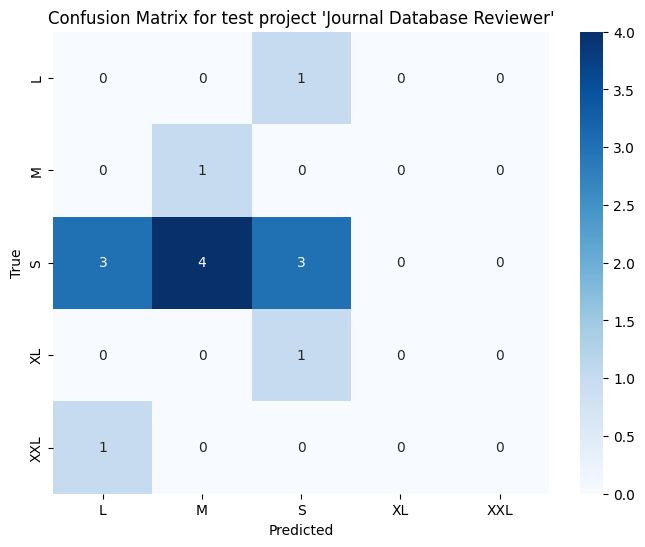

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.33      1.00      0.50         1
           M       0.17      1.00      0.29         1
           S       0.69      0.90      0.78        10
          XL       0.17      1.00      0.29         1
         XXL       0.25      1.00      0.40         1

   micro avg       0.41      0.93      0.57        14
   macro avg       0.32      0.98      0.45        14
weighted avg       0.56      0.93      0.66        14
 samples avg       0.59      0.93      0.66        14

Precision: 0.559981684981685     Recall: 0.9285714285714286      Accuracy: 0.42857142857142855      F1 Score: 0.6641082519964508

Confusion matrix for test project 'Journal Database Reviewer':


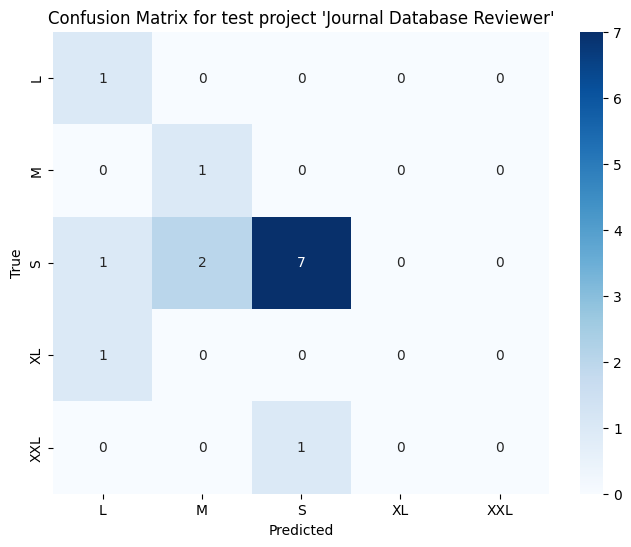

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      1.00      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         6
   macro avg       0.10      0.20      0.13         6
weighted avg       0.25      0.50      0.33         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.25     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

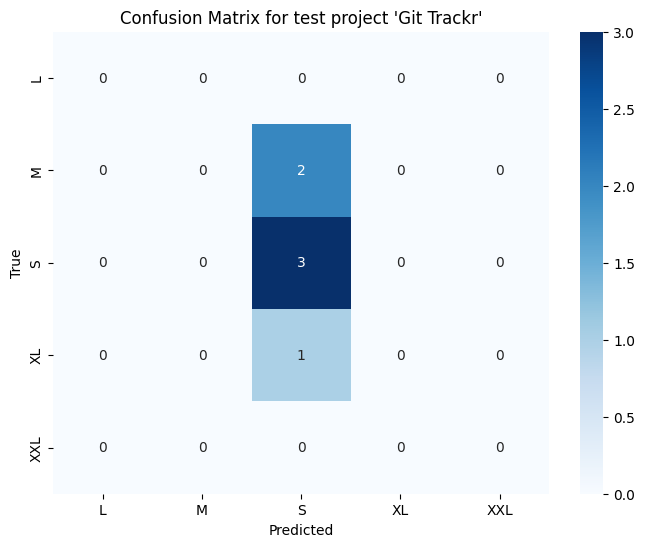

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.67      0.67      0.67         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.67      0.33      0.44         6
   macro avg       0.13      0.13      0.13         6
weighted avg       0.33      0.33      0.33         6
 samples avg       0.33      0.33      0.33         6

Precision: 0.3333333333333333     Recall: 0.3333333333333333      Accuracy: 0.3333333333333333      F1 Score: 0.3333333333333333

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

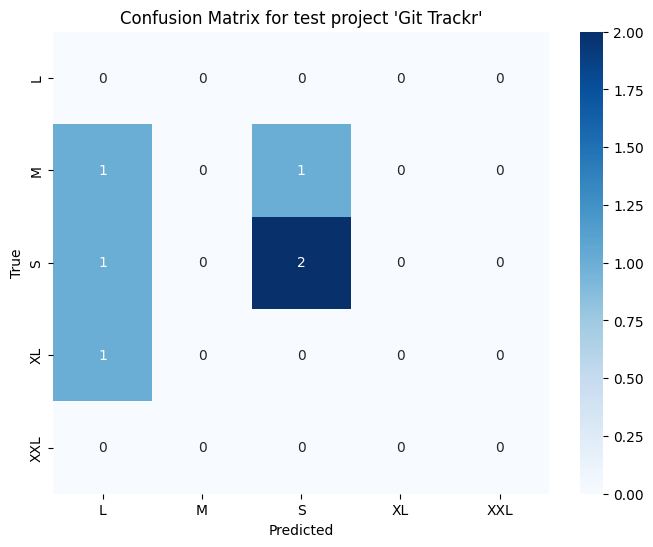

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.50      1.00      0.67         3
          XL       0.50      1.00      0.67         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.36      0.67      0.47         6
   macro avg       0.20      0.40      0.27         6
weighted avg       0.33      0.67      0.44         6
 samples avg       0.39      0.67      0.47         6

Precision: 0.3333333333333333     Recall: 0.6666666666666666      Accuracy: 0.16666666666666666      F1 Score: 0.4444444444444444

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

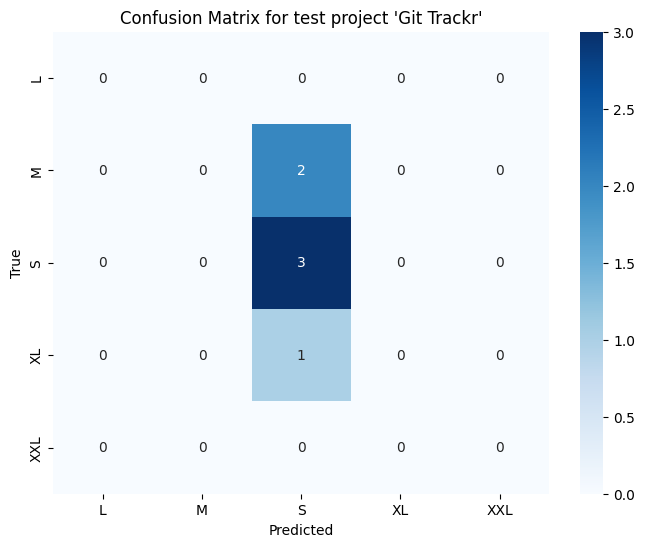

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.75      0.75      0.75         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.75      0.60      0.67         5
   macro avg       0.15      0.15      0.15         5
weighted avg       0.60      0.60      0.60         5
 samples avg       0.60      0.60      0.60         5

Precision: 0.6     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.6

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

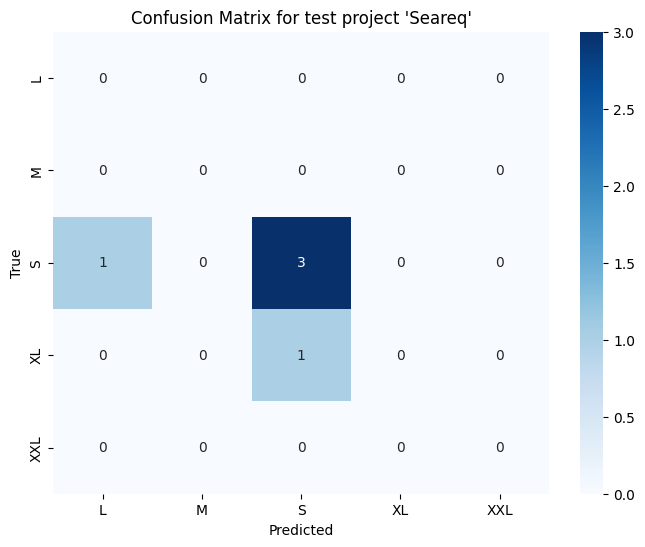

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.80      0.89         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.80      0.80      0.80         5
 samples avg       0.80      0.80      0.80         5

Precision: 0.8     Recall: 0.8      Accuracy: 0.8      F1 Score: 0.8

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

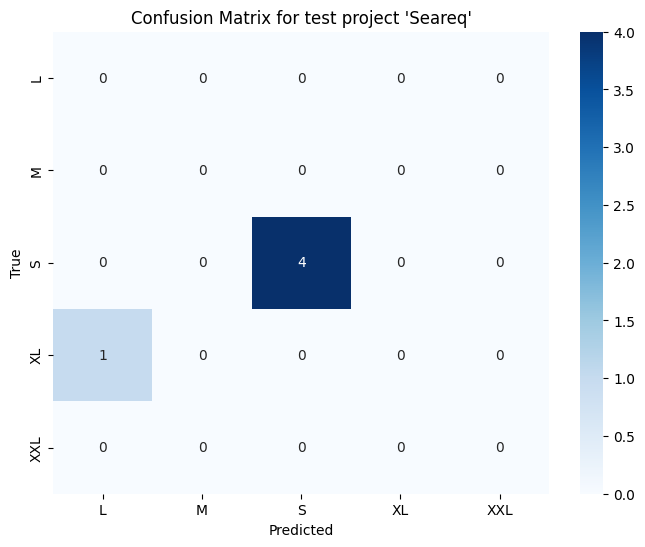

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.80      1.00      0.89         4
          XL       0.25      1.00      0.40         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.36      1.00      0.53         5
   macro avg       0.21      0.40      0.26         5
weighted avg       0.69      1.00      0.79         5
 samples avg       0.45      1.00      0.58         5

Precision: 0.6900000000000001     Recall: 1.0      Accuracy: 0.2      F1 Score: 0.7911111111111111

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


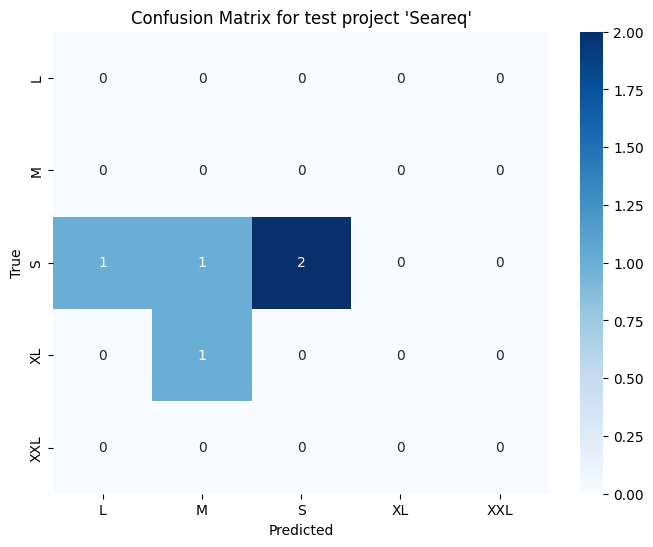

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.87      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.93      0.78      0.85        18
   macro avg       0.39      0.27      0.31        18
weighted avg       0.88      0.78      0.82        18
 samples avg       0.78      0.78      0.78        18



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.8849206349206349     Recall: 0.7777777777777778      Accuracy: 0.7777777777777778      F1 Score: 0.8212005108556834

Confusion matrix for test project 'Sales Monitoring on Multimarket':


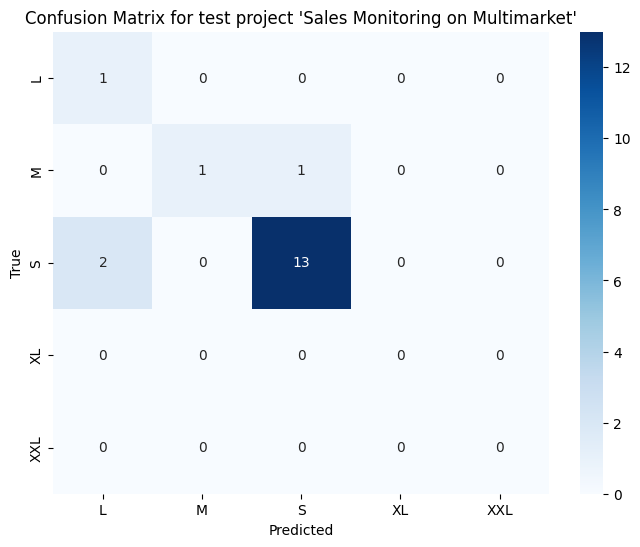

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.92      0.73      0.81        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.92      0.67      0.77        18
   macro avg       0.38      0.25      0.30        18
weighted avg       0.88      0.67      0.75        18
 samples avg       0.67      0.67      0.67        18

Precision: 0.875     Recall: 0.6666666666666666      Accuracy: 0.6666666666666666      F1 Score: 0.7530864197530864

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

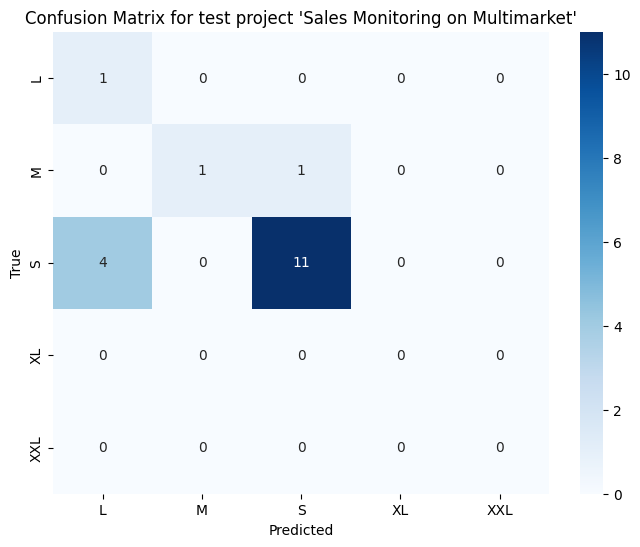

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.50      0.50      0.50         2
           S       0.88      0.93      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.68      0.83      0.75        18
   macro avg       0.28      0.29      0.28        18
weighted avg       0.78      0.83      0.81        18
 samples avg       0.69      0.83      0.74        18

Precision: 0.7847222222222222     Recall: 0.8333333333333334      Accuracy: 0.5555555555555556      F1 Score: 0.8082437275985663

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

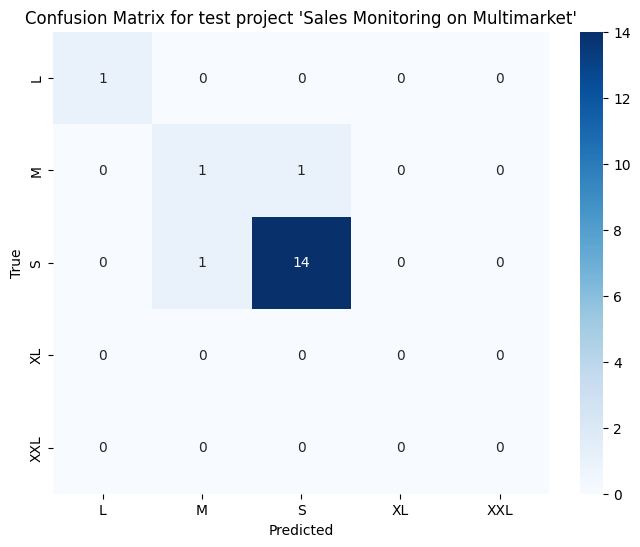

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.83      1.00      0.91         5
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67         2

   micro avg       0.88      0.88      0.88         8
   macro avg       0.57      0.50      0.52         8
weighted avg       0.90      0.88      0.86         8
 samples avg       0.88      0.88      0.88         8

Precision: 0.8958333333333334     Recall: 0.875      Accuracy: 0.875      F1 Score: 0.8598484848484848

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

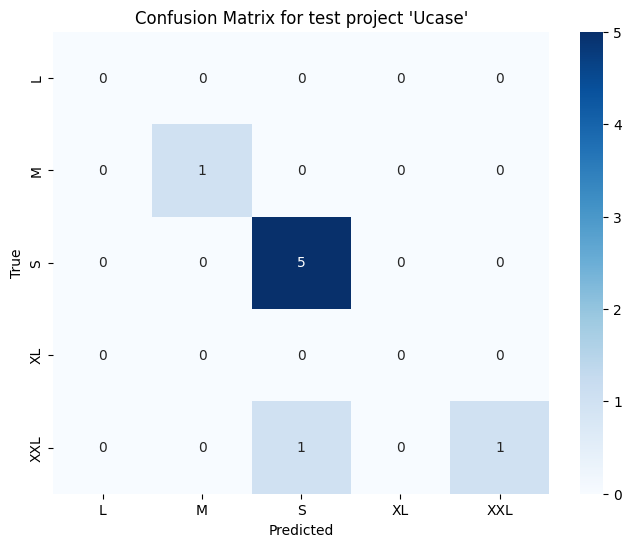

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       0.86      0.75      0.80         8
   macro avg       0.40      0.40      0.40         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

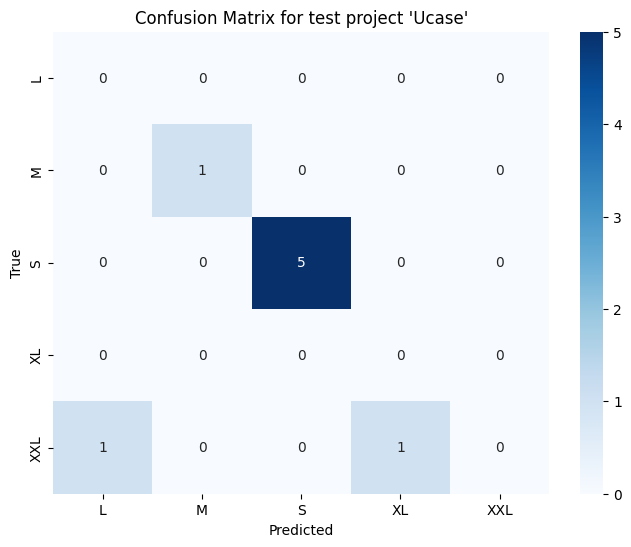

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.62      1.00      0.77         5
          XL       0.00      0.00      0.00         0
         XXL       0.67      1.00      0.80         2

   micro avg       0.50      1.00      0.67         8
   macro avg       0.46      0.60      0.51         8
weighted avg       0.68      1.00      0.81         8
 samples avg       0.68      1.00      0.76         8

Precision: 0.6822916666666666     Recall: 1.0      Accuracy: 0.5      F1 Score: 0.8057692307692308

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


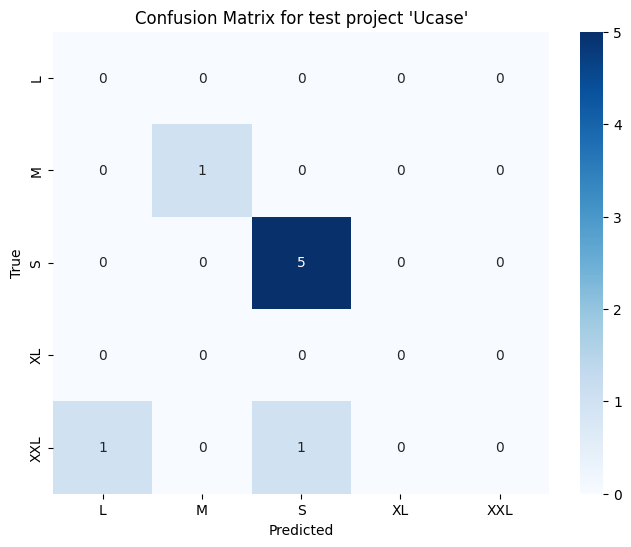

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.86      0.92         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       1.00      0.64      0.78        11
   macro avg       0.40      0.37      0.38        11
weighted avg       0.73      0.64      0.68        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.7272727272727273     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6783216783216782

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

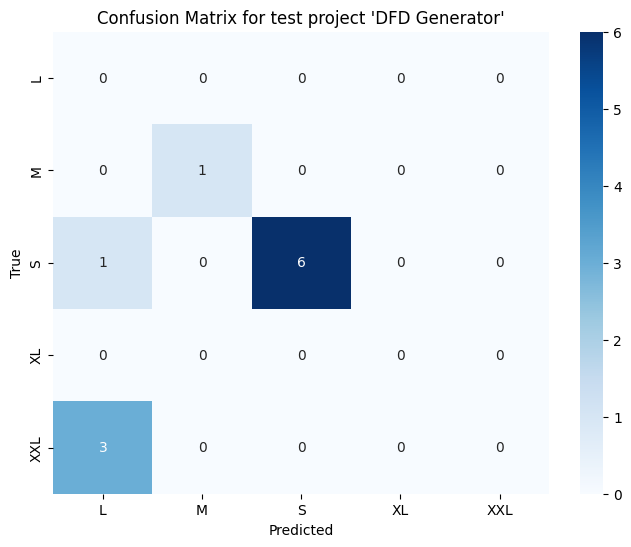

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.75      0.86      0.80         7
          XL       0.00      0.00      0.00         0
         XXL       0.60      1.00      0.75         3

   micro avg       0.67      0.91      0.77        11
   macro avg       0.47      0.57      0.51        11
weighted avg       0.73      0.91      0.80        11
 samples avg       0.73      0.91      0.79        11

Precision: 0.7318181818181819     Recall: 0.9090909090909091      Accuracy: 0.5454545454545454      F1 Score: 0.8045454545454546

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

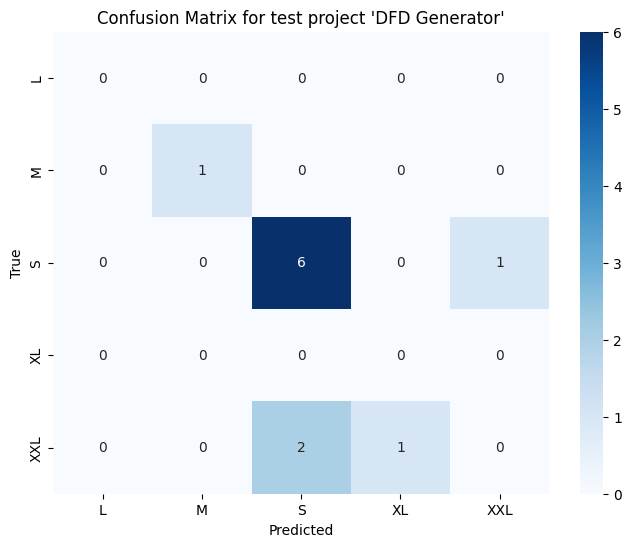

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.88      1.00      0.93         7
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         3

   micro avg       0.55      1.00      0.71        11
   macro avg       0.47      0.60      0.52        11
weighted avg       0.78      1.00      0.87        11
 samples avg       0.65      1.00      0.76        11

Precision: 0.7840909090909091     Recall: 1.0      Accuracy: 0.36363636363636365      F1 Score: 0.8666666666666667

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

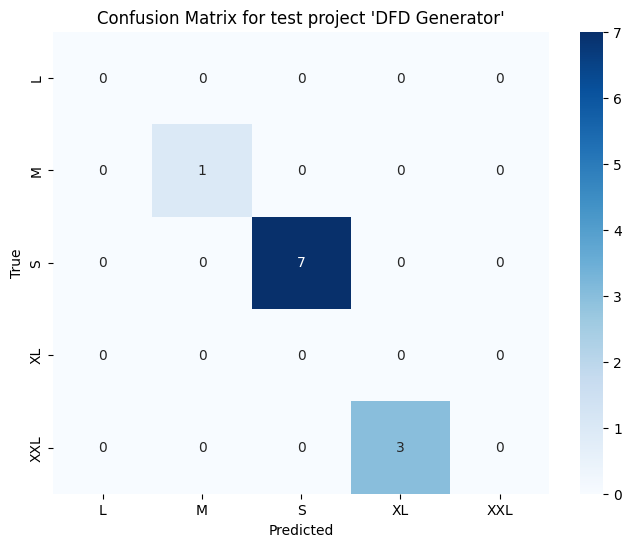

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.80      0.57      0.67         7
          XL       0.00      0.00      0.00         2
         XXL       0.25      1.00      0.40         1

   micro avg       0.60      0.55      0.57        11
   macro avg       0.41      0.51      0.41        11
weighted avg       0.62      0.55      0.55        11
 samples avg       0.55      0.55      0.55        11

Precision: 0.6227272727272728     Recall: 0.5454545454545454      Accuracy: 0.5454545454545454      F1 Score: 0.5515151515151515

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

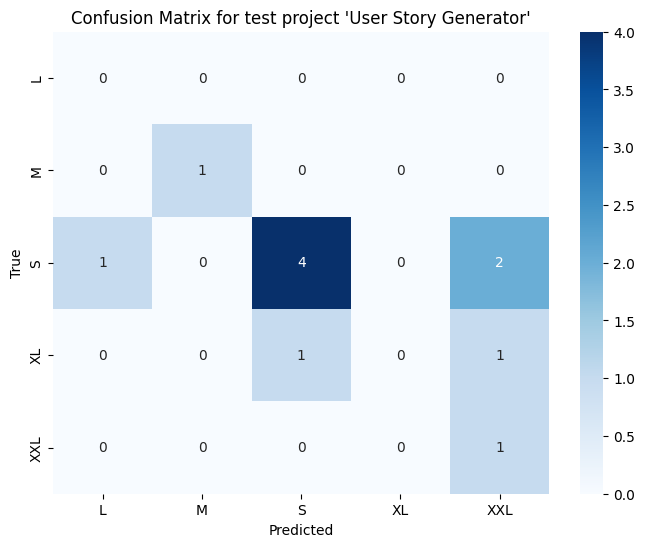

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.83      0.71      0.77         7
          XL       0.00      0.00      0.00         2
         XXL       0.33      1.00      0.50         1

   micro avg       0.70      0.64      0.67        11
   macro avg       0.43      0.54      0.45        11
weighted avg       0.65      0.64      0.63        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.6515151515151515     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6258741258741258

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

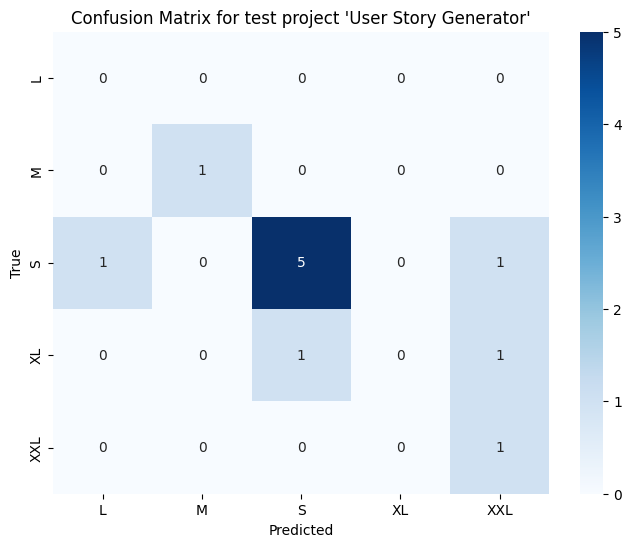

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.64      1.00      0.78         7
          XL       0.00      0.00      0.00         2
         XXL       0.25      1.00      0.40         1

   micro avg       0.56      0.82      0.67        11
   macro avg       0.38      0.60      0.44        11
weighted avg       0.52      0.82      0.62        11
 samples avg       0.64      0.82      0.70        11

Precision: 0.518595041322314     Recall: 0.8181818181818182      Accuracy: 0.45454545454545453      F1 Score: 0.6222222222222222

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

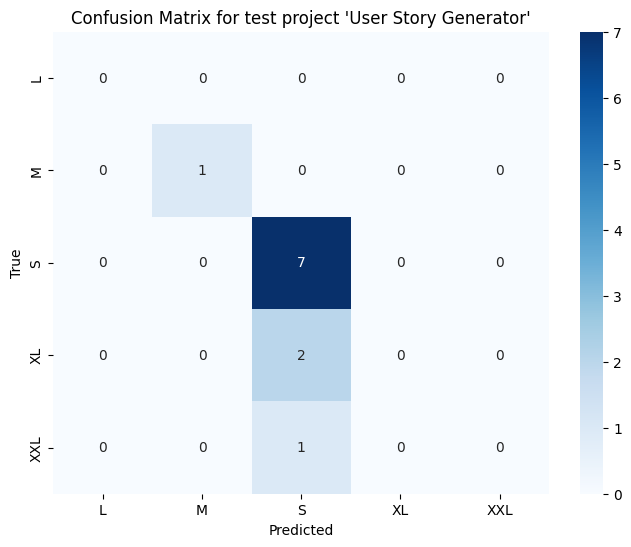

In [42]:
# Model (Numerik) <== 3 Skor Fitur Terbaik
accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())


# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_of_S3', 'number_of_F3', 'number_of_F4', 'number_of_A3', 'number_of_A4', 'number_of_A5']+columns_from_verb_list]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_of_S3', 'number_of_F3', 'number_of_F4', 'number_of_A3', 'number_of_A4', 'number_of_A5']+columns_from_verb_list]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [43]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.053263,0.227848,0.227848,0.086342,0.425339,0.291139,0.265823,0.256970,0.441119,0.759494,0.101266,0.503451
1,Jisebi Checker,0.660714,0.750000,0.625000,0.701923,0.812500,0.625000,0.625000,0.683333,0.625000,0.875000,0.625000,0.726190
2,Novelty Checker,0.804762,0.700000,0.600000,0.725000,0.950000,0.700000,0.600000,0.786667,0.933333,0.800000,0.700000,0.837500
3,Journal Database Reviewer,0.573413,0.571429,0.571429,0.554887,0.490476,0.357143,0.285714,0.380952,0.559982,0.928571,0.428571,0.664108
4,Git Trackr,0.250000,0.500000,0.500000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.166667,0.444444
5,Seareq,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.690000,1.000000,0.200000,0.791111
6,Sales Monitoring on Multimarket,0.884921,0.777778,0.777778,0.821201,0.875000,0.666667,0.666667,0.753086,0.784722,0.833333,0.555556,0.808244
7,Ucase,0.895833,0.875000,0.875000,0.859848,0.750000,0.750000,0.750000,0.750000,0.682292,1.000000,0.500000,0.805769
8,DFD Generator,0.727273,0.636364,0.636364,0.678322,0.731818,0.909091,0.545455,0.804545,0.784091,1.000000,0.363636,0.866667
9,User Story Generator,0.622727,0.545455,0.545455,0.551515,0.651515,0.636364,0.636364,0.625874,0.518595,0.818182,0.454545,0.622222


In [44]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.5958872632290353, 0.5508355252342595, 0.409524129176028]


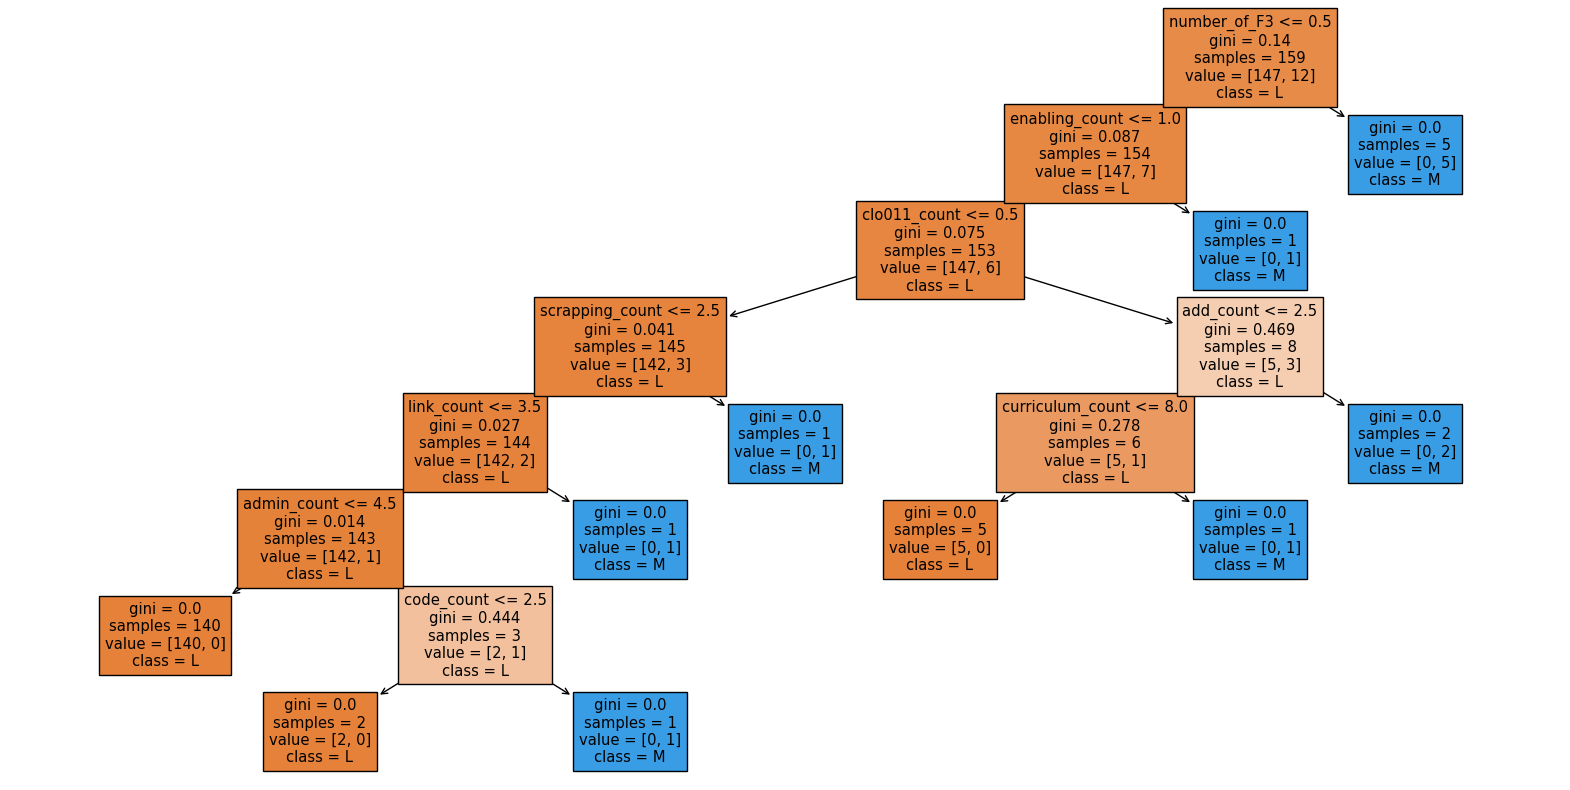

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ------------ -------------------------- 92.2/278.7 kB 2.6 MB/s eta 0:00:01
     ----------------------- -------------- 174.1/278.7 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 860.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=43e1524bdf1780bf5cd25ce2a175e012de082d61a7d43783401b005c


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first decision tree in the ensemble
plt.figure(figsize=(20,10))
plot_tree(modelDecisionTree.estimators_[0], feature_names=X_train.columns, class_names=encoder.categories_[0], filled=True)
plt.show()
